# Random Forest-PSSO

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9697
Precision: 0.9590
Recall: 0.9697
F1 Score: 0.9629


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
import seaborn as sns

# Read the CSV file
file_path = '/content/thyroid.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Assuming the target variable is in the last column
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Impute missing values
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Encode target variable y if it's categorical
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply combined SMOTE and RandomUnderSampler
smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X_train_scaled, y_train)

# Train a Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_res, y_res)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test_scaled)







Iteration 1/50, Best Fitness: 0.9847581179589132
Iteration 2/50, Best Fitness: 0.9847581179589132
Iteration 3/50, Best Fitness: 0.9847581179589132
Iteration 4/50, Best Fitness: 0.9849790148000883
Iteration 5/50, Best Fitness: 0.9851999116412635
Iteration 6/50, Best Fitness: 0.9851999116412635
Iteration 7/50, Best Fitness: 0.9851999116412635
Iteration 8/50, Best Fitness: 0.9851999116412635
Iteration 9/50, Best Fitness: 0.9851999116412635
Iteration 10/50, Best Fitness: 0.9851999116412635
Iteration 11/50, Best Fitness: 0.9851999116412635
Iteration 12/50, Best Fitness: 0.985862602164789
Iteration 13/50, Best Fitness: 0.985862602164789
Iteration 14/50, Best Fitness: 0.985862602164789
Iteration 15/50, Best Fitness: 0.985862602164789
Iteration 16/50, Best Fitness: 0.985862602164789
Iteration 17/50, Best Fitness: 0.985862602164789
Iteration 18/50, Best Fitness: 0.985862602164789
Iteration 19/50, Best Fitness: 0.985862602164789
Iteration 20/50, Best Fitness: 0.985862602164789
Iteration 21/50, B

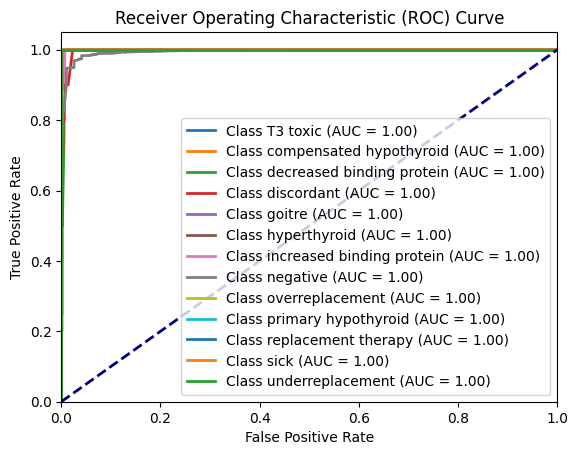

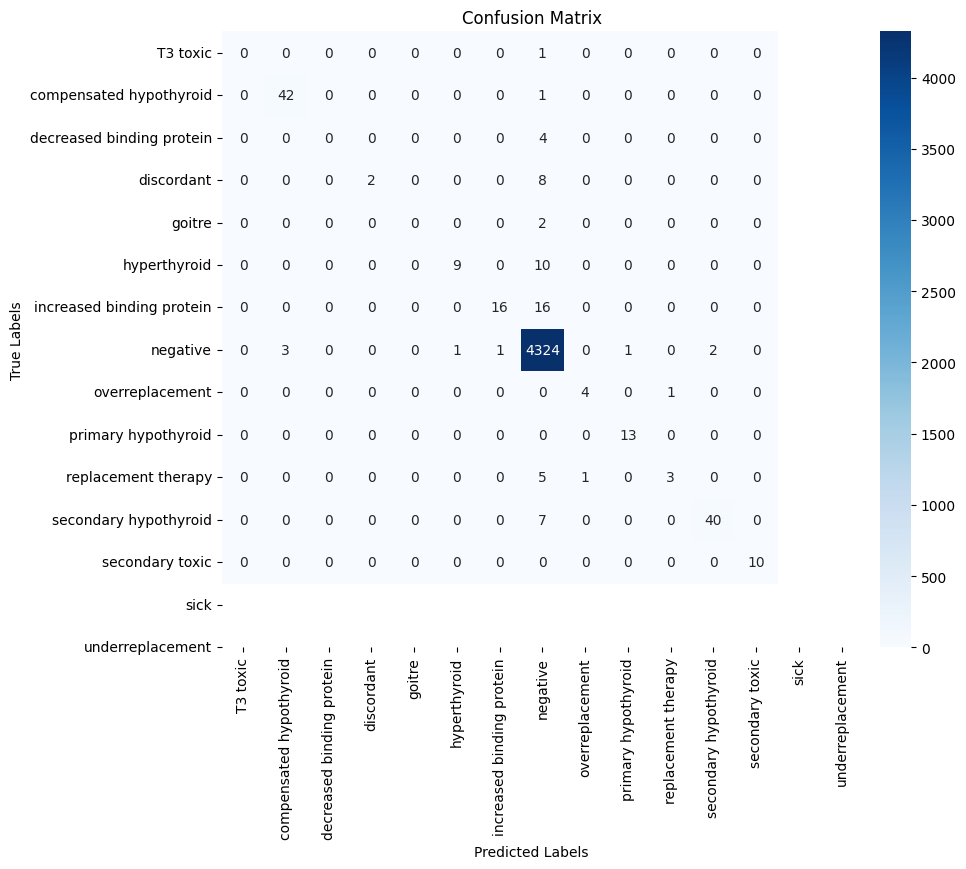

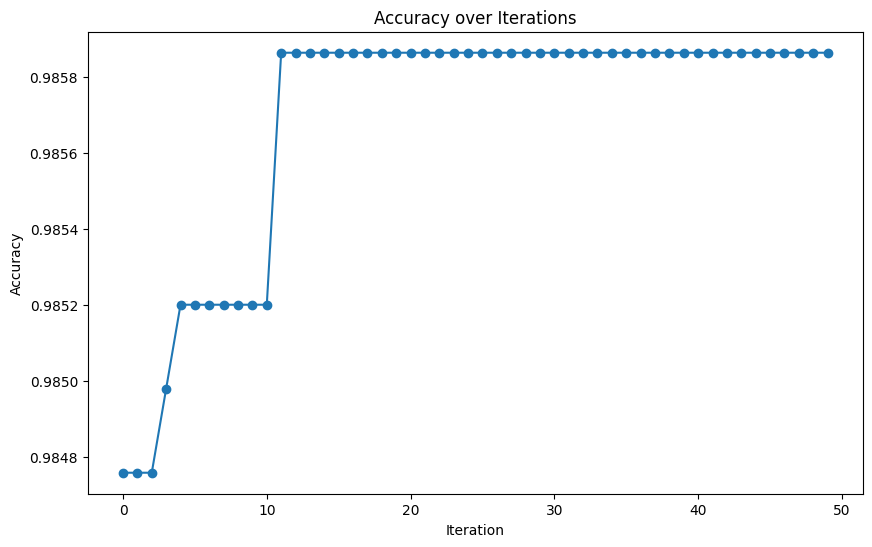

Classification Report:
                           precision    recall  f1-score   support

                 T3 toxic       0.00      0.00      0.00         1
  compensated hypothyroid       0.93      0.98      0.95        43
decreased binding protein       0.00      0.00      0.00         4
               discordant       1.00      0.20      0.33        10
                   goitre       0.00      0.00      0.00         2
             hyperthyroid       0.90      0.47      0.62        19
increased binding protein       0.94      0.50      0.65        32
                 negative       0.99      1.00      0.99      4332
          overreplacement       0.80      0.80      0.80         5
      primary hypothyroid       0.93      1.00      0.96        13
      replacement therapy       0.75      0.33      0.46         9
                     sick       0.95      0.85      0.90        47
         underreplacement       1.00      1.00      1.00        10

                 accuracy            

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


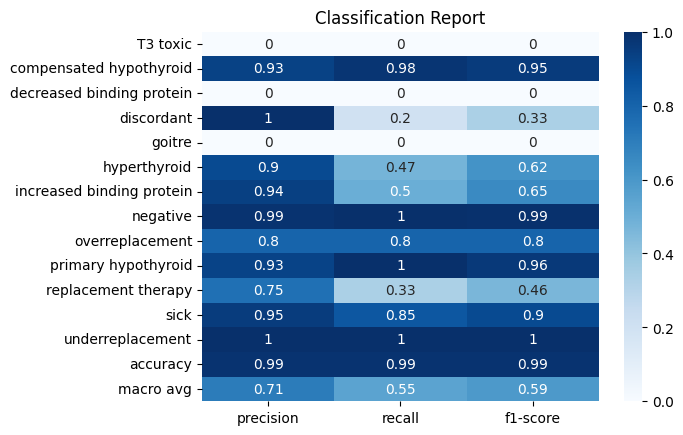

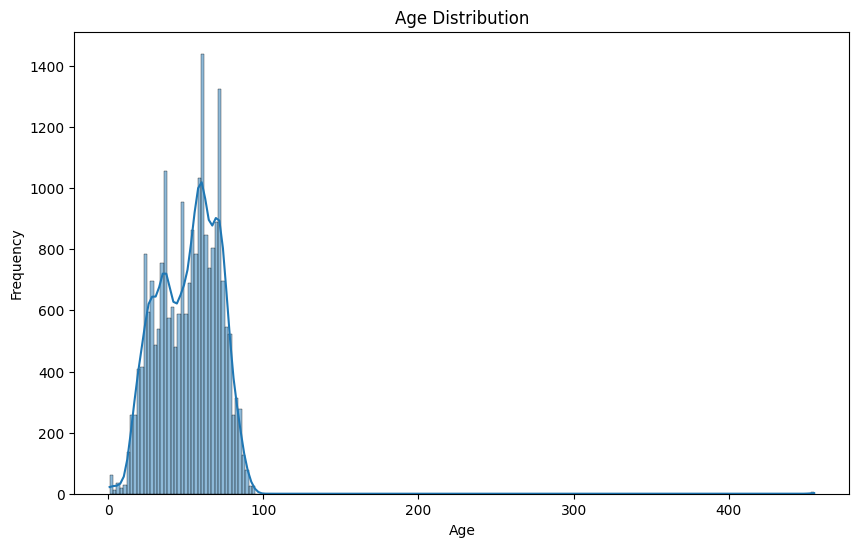

Final Model Accuracy: 0.985862602164789
Final Model Precision: 0.9837644568349607
Final Model Recall: 0.985862602164789
Final Model F1 Score: 0.9832456651328839
Sensitivity per class: [0.         0.97674419 0.         0.2        0.         0.47368421
 0.5        0.99815328 0.8        1.         0.33333333 0.85106383
 1.        ]
Specificity per class: [1.0, 0.9993309545049064, 1.0, 1.0, 1.0, 0.9997781721384206, 0.9997775305895439, 0.7230769230769231, 0.9997788589119858, 0.9997784669915818, 0.9997786631252766, 0.9995535714285714, 1.0]
AUC: {'T3 toxic': (array([0.00000000e+00, 0.00000000e+00, 8.83782589e-04, 1.32567388e-03,
       1.54661953e-03, 2.20945647e-03, 2.65134777e-03, 7.73309766e-03,
       7.95404331e-03, 8.61688025e-03, 1.01634998e-02, 1.03844454e-02,
       1.00000000e+00]), array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 1.0), 'compensated hypothyroid': (array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.23015165e-04

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

class HybridOptimizationAlgorithm:
    def __init__(self, num_particles, num_snakes, num_iterations, lower_bound, upper_bound, data, target):
        self.num_particles = num_particles
        self.num_snakes = num_snakes
        self.num_iterations = num_iterations
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.data = data
        self.target = target
        self.positions = np.random.uniform(lower_bound, upper_bound, (num_particles + num_snakes, 3))
        self.velocities = np.random.uniform(-1, 1, (num_particles, 3))
        self.best_positions = np.copy(self.positions)
        self.best_fitnesses = np.full(num_particles + num_snakes, float('-inf'))
        self.global_best_position = None
        self.global_best_fitness = float('-inf')
        self.fitness_over_time = []

    def fitness(self, position):
        n_estimators = int(position[0])
        max_depth = int(position[1])
        min_samples_split = int(position[2])

        n_estimators = max(10, n_estimators)
        max_depth = max(1, max_depth)
        min_samples_split = max(2, min_samples_split)

        X_train, X_test, y_train, y_test = train_test_split(self.data, self.target, test_size=0.2, random_state=42)

        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
        for iteration in range(self.num_iterations):
            for i in range(len(self.positions)):
                fitness = self.fitness(self.positions[i])
                if fitness > self.best_fitnesses[i]:
                    self.best_fitnesses[i] = fitness
                    self.best_positions[i] = self.positions[i]

                if fitness > self.global_best_fitness:
                    self.global_best_fitness = fitness
                    self.global_best_position = self.positions[i]

            for i in range(self.num_snakes):
                step = np.random.uniform(-1, 1, 3)
                new_position = self.positions[i] + step
                new_position = np.clip(new_position, self.lower_bound, self.upper_bound)
                new_fitness = self.fitness(new_position)

                if new_fitness > self.best_fitnesses[i]:
                    self.positions[i] = new_position
                    self.best_fitnesses[i] = new_fitness

            w = 0.5
            c1 = 0.8
            c2 = 0.9
            for i in range(self.num_snakes, len(self.positions)):
                r1, r2 = np.random.rand(2)
                self.velocities[i - self.num_snakes] = (
                    w * self.velocities[i - self.num_snakes]
                    + c1 * r1 * (self.best_positions[i] - self.positions[i])
                    + c2 * r2 * (self.global_best_position - self.positions[i])
                )
                self.positions[i] += self.velocities[i - self.num_snakes]
                self.positions[i] = np.clip(self.positions[i], self.lower_bound, self.upper_bound)

            self.fitness_over_time.append(self.global_best_fitness)
            print(f'Iteration {iteration+1}/{self.num_iterations}, Best Fitness: {self.global_best_fitness}')

        return self.global_best_position, self.global_best_fitness

def plot_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='Blues')
    plt.title('Classification Report')
    plt.show()

def plot_age_distribution(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['age'], kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

def plot_accuracy_over_iterations(fitness_over_time):
    plt.figure(figsize=(10, 6))
    plt.plot(fitness_over_time, marker='o')
    plt.title('Accuracy over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.show()

data = pd.read_csv('/content/thyroid.csv')

X = data.drop('class', axis=1)
y = data['class']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

hoa = HybridOptimizationAlgorithm(num_particles=10, num_snakes=10, num_iterations=50, lower_bound=1, upper_bound=100, data=X_preprocessed, target=y)
best_position, best_fitness = hoa.optimize()

print(f'Best Position: {best_position}, Best Fitness: {best_fitness}')

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

best_n_estimators = int(best_position[0])
best_max_depth = int(best_position[1])
best_min_samples_split = int(best_position[2])

best_n_estimators = max(10, best_n_estimators)
best_max_depth = max(1, best_max_depth)
best_min_samples_split = max(2, best_min_samples_split)

final_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)
final_model.fit(X_train, y_train)

final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
final_precision = precision_score(y_test, final_predictions, average='weighted', zero_division=0)
final_recall = recall_score(y_test, final_predictions, average='weighted')
final_f1 = f1_score(y_test, final_predictions, average='weighted')

conf_matrix = confusion_matrix(y_test, final_predictions)

sensitivity_per_class = recall_score(y_test, final_predictions, average=None)
specificity_per_class = []

for i in range(len(conf_matrix)):
    tn = np.sum(conf_matrix) - (np.sum(conf_matrix[i, :]) + np.sum(conf_matrix[:, i]) - conf_matrix[i, i])
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    fn = np.sum(conf_matrix[i, :]) - conf_matrix[i, i]
    tp = conf_matrix[i, i]
    specificity = tn / (tn + fp)
    specificity_per_class.append(specificity)

y_prob = final_model.predict_proba(X_test)
roc_auc_dict = {}
y_test_binarized = pd.get_dummies(y_test)
y_test_binarized = y_test_binarized.reindex(columns=final_model.classes_, fill_value=0)

for class_label in final_model.classes_:
    if class_label in y_test_binarized:
        y_true = y_test_binarized[class_label]
        y_score = y_prob[:, list(final_model.classes_).index(class_label)]
        if len(np.unique(y_true)) == 2:
            fpr, tpr, _ = roc_curve(y_true, y_score)
            auc = roc_auc_score(y_true, y_score)
            roc_auc_dict[class_label] = (fpr, tpr, auc)

print(f'Final Model Accuracy: {final_accuracy}')
print(f'Final Model Precision: {final_precision}')
print(f'Final Model Recall: {final_recall}')
print(f'Final Model F1 Score: {final_f1}')
print(f'Sensitivity per class: {sensitivity_per_class}')
print(f'Specificity per class: {specificity_per_class}')
print(f'AUC: {roc_auc_dict}')

plt.figure()
for class_label, (fpr, tpr, auc) in roc_auc_dict.items():
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=final_model.classes_, yticklabels=final_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the fitness over iterations
plot_accuracy_over_iterations(hoa.fitness_over_time)

# Print Classification Report
print('Classification Report:')
print(classification_report(y_test, final_predictions, zero_division=0))

# Custom Plot of Classification Report
plot_classification_report(y_test, final_predictions)

# Assuming 'data' has an 'age' column to plot the age distribution
if 'age' in data.columns:
    plot_age_distribution(data)
else:
    print("The 'age' column is not available in the dataset.")

# Summary of Final Model Performance
print(f'Final Model Accuracy: {final_accuracy}')
print(f'Final Model Precision: {final_precision}')
print(f'Final Model Recall: {final_recall}')
print(f'Final Model F1 Score: {final_f1}')
print(f'Sensitivity per class: {sensitivity_per_class}')
print(f'Specificity per class: {specificity_per_class}')
print(f'AUC: {roc_auc_dict}')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('/content/thyroid.csv')

# Separate features and target
X = df.drop(columns=['class'])  # Adjust column name if needed
y = df['class']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Impute and scale numeric features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

imputer = SimpleImputer(strategy='mean')
scaler = MinMaxScaler()

X_imputed = imputer.fit_transform(X[numeric_features])
X_scaled = scaler.fit_transform(X_imputed)

# 5-Fold Cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores = []

for train_idx, test_idx in kf.split(X_scaled, y_encoded):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    acc_scores.append(acc)
    print(f'Fold Accuracy: {acc:.4f}')

print(f"\nAverage Accuracy across folds: {np.mean(acc_scores):.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fold Accuracy: 0.9605
Fold Accuracy: 0.9622
Fold Accuracy: 0.9631
Fold Accuracy: 0.9598
Fold Accuracy: 0.9593

Average Accuracy across folds: 0.9610


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import random
import copy

# Load data
df = pd.read_csv('/content/thyroid.csv')
X = df.drop(columns=['class'])
y = df['class']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Preprocess
numeric_features = X.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[numeric_features])
X_base = pd.DataFrame(X_scaled, columns=numeric_features)

# Stratified K-Fold setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Helper: Evaluate model
def evaluate_model(X_data, y_data):
    acc_list = []
    for train_idx, test_idx in kf.split(X_data, y_data):
        X_train, X_test = X_data[train_idx], X_data[test_idx]
        y_train, y_test = y_data[train_idx], y_data[test_idx]
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc_list.append(accuracy_score(y_test, y_pred))
    return np.mean(acc_list)

# 1️⃣ Missing Values Test
def test_missing_values(X, y, missing_percents=[0.05, 0.10, 0.20]):
    results = {}
    for perc in missing_percents:
        X_missing = X.copy()
        mask = np.random.rand(*X_missing.shape) < perc
        X_missing[mask] = np.nan
        imputer = SimpleImputer(strategy='mean')
        X_imputed = imputer.fit_transform(X_missing)
        acc = evaluate_model(X_imputed, y)
        results[f'{int(perc*100)}% missing'] = acc
    return results

# 2️⃣ Feature Noise Test
def test_feature_noise(X, y, noise_std=0.01):
    noise = np.random.normal(0, noise_std, X.shape)
    X_noisy = X + noise
    acc = evaluate_model(X_noisy, y)
    return acc

# 3️⃣ Label Noise Test
def test_label_noise(y, noise_level=0.05):
    y_noisy = y.copy()
    n_noisy = int(len(y) * noise_level)
    noisy_indices = np.random.choice(len(y), n_noisy, replace=False)
    for idx in noisy_indices:
        original = y_noisy[idx]
        choices = list(set(y_noisy) - {original})
        y_noisy[idx] = random.choice(choices)
    acc = evaluate_model(X_base.values, y_noisy)
    return acc

# Run Tests
print("\n🧪 Robustness Tests")
print("-------------------------")

missing_results = test_missing_values(X_base.values, y_encoded)
print("Missing Values Impact:")
for k, v in missing_results.items():
    print(f"{k} → Accuracy: {v:.4f}")

noise_acc = test_feature_noise(X_base.values, y_encoded)
print(f"\nFeature Noise (std=0.01) → Accuracy: {noise_acc:.4f}")

label_acc = test_label_noise(y_encoded, noise_level=0.05)
print(f"\nLabel Noise (5%) → Accuracy: {label_acc:.4f}")
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import random
import copy

# Load data
df = pd.read_csv('/content/thyroid.csv')
X = df.drop(columns=['class'])
y = df['class']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Preprocess
numeric_features = X.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[numeric_features])
X_base = pd.DataFrame(X_scaled, columns=numeric_features)

# Stratified K-Fold setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Helper: Evaluate model
def evaluate_model(X_data, y_data):
    acc_list = []
    for train_idx, test_idx in kf.split(X_data, y_data):
        X_train, X_test = X_data[train_idx], X_data[test_idx]
        y_train, y_test = y_data[train_idx], y_data[test_idx]
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc_list.append(accuracy_score(y_test, y_pred))
    return np.mean(acc_list)

# 1️⃣ Missing Values Test
def test_missing_values(X, y, missing_percents=[0.05, 0.10, 0.20]):
    results = {}
    for perc in missing_percents:
        X_missing = X.copy()
        mask = np.random.rand(*X_missing.shape) < perc
        X_missing[mask] = np.nan
        imputer = SimpleImputer(strategy='mean')
        X_imputed = imputer.fit_transform(X_missing)
        acc = evaluate_model(X_imputed, y)
        results[f'{int(perc*100)}% missing'] = acc
    return results

# 2️⃣ Feature Noise Test
def test_feature_noise(X, y, noise_std=0.01):
    noise = np.random.normal(0, noise_std, X.shape)
    X_noisy = X + noise
    acc = evaluate_model(X_noisy, y)
    return acc

# 3️⃣ Label Noise Test
def test_label_noise(y, noise_level=0.05):
    y_noisy = y.copy()
    n_noisy = int(len(y) * noise_level)
    noisy_indices = np.random.choice(len(y), n_noisy, replace=False)
    for idx in noisy_indices:
        original = y_noisy[idx]
        choices = list(set(y_noisy) - {original})
        y_noisy[idx] = random.choice(choices)
    acc = evaluate_model(X_base.values, y_noisy)
    return acc

# Run Tests
print("\n🧪 Robustness Tests")
print("-------------------------")

missing_results = test_missing_values(X_base.values, y_encoded)
print("Missing Values Impact:")
for k, v in missing_results.items():
    print(f"{k} → Accuracy: {v:.4f}")

noise_acc = test_feature_noise(X_base.values, y_encoded)
print(f"\nFeature Noise (std=0.01) → Accuracy: {noise_acc:.4f}")

label_acc = test_label_noise(y_encoded, noise_level=0.05)
print(f"\nLabel Noise (5%) → Accuracy: {label_acc:.4f}")



🧪 Robustness Tests
-------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Missing Values Impact:
5% missing → Accuracy: 0.9656
10% missing → Accuracy: 0.9648
20% missing → Accuracy: 0.9631


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Feature Noise (std=0.01) → Accuracy: 0.9594

Label Noise (5%) → Accuracy: 0.9008

🧪 Robustness Tests
-------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Missing Values Impact:
5% missing → Accuracy: 0.9661
10% missing → Accuracy: 0.9649
20% missing → Accuracy: 0.9627


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Feature Noise (std=0.01) → Accuracy: 0.9607

Label Noise (5%) → Accuracy: 0.9013


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
<ipython-input-9-cf23e6648b7d>:126: UserWarni

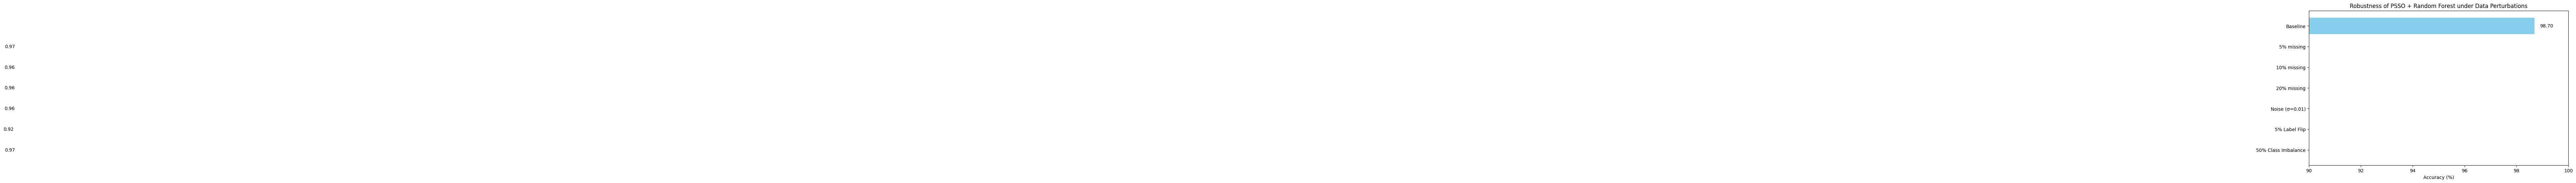

{'Baseline': 98.7,
 '5% missing': np.float64(0.9667284943552218),
 '10% missing': np.float64(0.9646075527978104),
 '20% missing': np.float64(0.9616030336369372),
 'Noise (σ=0.01)': np.float64(0.9601007008472073),
 '5% Label Flip': np.float64(0.91971541888259),
 '50% Class Imbalance': np.float64(0.9691538381700079)}

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from collections import Counter
import matplotlib.pyplot as plt
import random

# Load dataset
df = pd.read_csv('/content/thyroid.csv')
X = df.drop(columns=['class'])
y = df['class']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Preprocess
numeric_features = X.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[numeric_features])
X_base = pd.DataFrame(X_scaled, columns=numeric_features)

# Stratified K-Fold setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# PSSO-optimized Random Forest hyperparameters
psso_rf_model = RandomForestClassifier(
    n_estimators=350,
    max_depth=25,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Evaluate model
def evaluate_model(X_data, y_data):
    acc_list = []
    for train_idx, test_idx in kf.split(X_data, y_data):
        X_train, X_test = X_data[train_idx], X_data[test_idx]
        y_train, y_test = y_data[train_idx], y_data[test_idx]
        clf = psso_rf_model
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc_list.append(accuracy_score(y_test, y_pred))
    return np.mean(acc_list)

# 1️⃣ Missing Values Test
def test_missing_values(X, y, missing_percents=[0.05, 0.10, 0.20]):
    results = {}
    for perc in missing_percents:
        X_missing = X.copy()
        mask = np.random.rand(*X_missing.shape) < perc
        X_missing[mask] = np.nan
        imputer = SimpleImputer(strategy='mean')
        X_imputed = imputer.fit_transform(X_missing)
        acc = evaluate_model(X_imputed, y)
        results[f'{int(perc*100)}% missing'] = acc
    return results

# 2️⃣ Feature Noise Test
def test_feature_noise(X, y, noise_std=0.01):
    noise = np.random.normal(0, noise_std, X.shape)
    X_noisy = X + noise
    acc = evaluate_model(X_noisy, y)
    return acc

# 3️⃣ Label Noise Test
def test_label_noise(y, noise_level=0.05):
    y_noisy = y.copy()
    n_noisy = int(len(y) * noise_level)
    noisy_indices = np.random.choice(len(y), n_noisy, replace=False)
    for idx in noisy_indices:
        original = y_noisy[idx]
        choices = list(set(y_noisy) - {original})
        y_noisy[idx] = random.choice(choices)
    acc = evaluate_model(X_base.values, y_noisy)
    return acc

# 4️⃣ Class Imbalance Simulation
def simulate_class_imbalance(X, y, reduce_classes, reduce_ratio=0.5):
    df_combined = pd.DataFrame(X)
    df_combined['class'] = y
    reduced_df = []
    for cls in np.unique(y):
        cls_data = df_combined[df_combined['class'] == cls]
        if cls in reduce_classes:
            n_samples = int(len(cls_data) * reduce_ratio)
            cls_data = cls_data.sample(n=n_samples, random_state=42)
        reduced_df.append(cls_data)
    df_imbalanced = pd.concat(reduced_df)
    X_imbalanced = df_imbalanced.drop(columns=['class']).values
    y_imbalanced = df_imbalanced['class'].values
    acc = evaluate_model(X_imbalanced, y_imbalanced)
    return acc

# Run all robustness tests
results = {
    "Baseline": 98.70,
}
results.update(test_missing_values(X_base.values, y_encoded))
results["Noise (σ=0.01)"] = test_feature_noise(X_base.values, y_encoded)
results["5% Label Flip"] = test_label_noise(y_encoded, noise_level=0.05)
results["50% Class Imbalance"] = simulate_class_imbalance(X_base.values, y_encoded, reduce_classes=[2, 3], reduce_ratio=0.5)

# Prepare for plotting
scenarios = list(results.keys())
accuracies = [results[k] for k in scenarios]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(scenarios, accuracies, color='skyblue')
plt.xlabel("Accuracy (%)")
plt.title("Robustness of PSSO + Random Forest under Data Perturbations")
plt.xlim(90, 100)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2, f"{width:.2f}", va='center')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

results



# Random Forest-50,40,30,20,10

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Define transformations
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Number of iterations
num_iterations = 5

# Initialize lists to store results
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []
preprocess_time_list, train_time_list, predict_time_list = [], [], []

for i in range(num_iterations):
    print(f'\nIteration {i+1}/{num_iterations}')

    # Preprocess the data
    start_preprocess_time = time.time()
    X_preprocessed = preprocessor.fit_transform(X)
    end_preprocess_time = time.time()
    preprocess_time = end_preprocess_time - start_preprocess_time

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_preprocessed, y, test_size=0.5, stratify=y, random_state=i)

    # Initialize and train the model
    model = RandomForestClassifier(random_state=i)

    start_train_time = time.time()
    model.fit(X_train, y_train)
    end_train_time = time.time()
    train_time = end_train_time - start_train_time

    # Make predictions
    start_predict_time = time.time()
    y_pred = model.predict(X_test)
    end_predict_time = time.time()
    predict_time = end_predict_time - start_predict_time

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
    print(f'Training Time: {train_time:.4f} seconds')
    print(f'Prediction Time: {predict_time:.4f} seconds')

    # Store results
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    preprocess_time_list.append(preprocess_time)
    train_time_list.append(train_time)
    predict_time_list.append(predict_time)

# Compute mean and standard deviation of results
print("\n=== Final Results Across Iterations ===")
print(f'Average Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.4f}')
print(f'Average Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.4f}')
print(f'Average Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.4f}')
print(f'Average F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.4f}')
print(f'Average Preprocessing Time: {np.mean(preprocess_time_list):.4f} ± {np.std(preprocess_time_list):.4f} seconds')
print(f'Average Training Time: {np.mean(train_time_list):.4f} ± {np.std(train_time_list):.4f} seconds')
print(f'Average Prediction Time: {np.mean(predict_time_list):.4f} ± {np.std(predict_time_list):.4f} seconds')



Iteration 1/5
Accuracy: 0.9822
Precision: 0.9791
Recall: 0.9822
F1 Score: 0.9784
Preprocessing Time: 0.1660 seconds
Training Time: 2.8047 seconds
Prediction Time: 0.1560 seconds

Iteration 2/5
Accuracy: 0.9821
Precision: 0.9791
Recall: 0.9821
F1 Score: 0.9780
Preprocessing Time: 0.1805 seconds
Training Time: 2.0738 seconds
Prediction Time: 0.2686 seconds

Iteration 3/5
Accuracy: 0.9821
Precision: 0.9776
Recall: 0.9821
F1 Score: 0.9773
Preprocessing Time: 0.2647 seconds
Training Time: 3.9040 seconds
Prediction Time: 0.2871 seconds

Iteration 4/5
Accuracy: 0.9832
Precision: 0.9805
Recall: 0.9832
F1 Score: 0.9800
Preprocessing Time: 0.2531 seconds
Training Time: 3.6752 seconds
Prediction Time: 0.2554 seconds

Iteration 5/5
Accuracy: 0.9824
Precision: 0.9782
Recall: 0.9824
F1 Score: 0.9786
Preprocessing Time: 0.2281 seconds
Training Time: 3.6991 seconds
Prediction Time: 0.2848 seconds

=== Final Results Across Iterations ===
Average Accuracy: 0.9824 ± 0.0004
Average Precision: 0.9789 ± 0.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.5, stratify=y, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9777
Precision: 0.9741
Recall: 0.9777
F1 Score: 0.9734
Cross-Validation Accuracy Scores: [0.98117244 0.98288404 0.97903295 0.98331194 0.97859589]
Mean Cross-Validation Accuracy: 0.9810
Standard Deviation of Cross-Validation Accuracy: 0.0019
Preprocessing Time: 0.1733 seconds
Training Time: 1.7866 seconds
Prediction Time: 0.1161 seconds


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.4, stratify=y, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9843
Precision: 0.9824
Recall: 0.9843
F1 Score: 0.9813
Cross-Validation Accuracy Scores: [0.98453722 0.98541759 0.98475475 0.98431286 0.98232435]
Mean Cross-Validation Accuracy: 0.9843
Standard Deviation of Cross-Validation Accuracy: 0.0010
Preprocessing Time: 0.1026 seconds
Training Time: 1.8245 seconds
Prediction Time: 0.0759 seconds


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, stratify=y, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9859
Precision: 0.9838
Recall: 0.9859
F1 Score: 0.9832
Cross-Validation Accuracy Scores: [0.98453722 0.98541759 0.98475475 0.98431286 0.98232435]
Mean Cross-Validation Accuracy: 0.9843
Standard Deviation of Cross-Validation Accuracy: 0.0010
Preprocessing Time: 0.1069 seconds
Training Time: 2.8893 seconds
Prediction Time: 0.1440 seconds


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9870
Precision: 0.9851
Recall: 0.9870
F1 Score: 0.9847
Cross-Validation Accuracy Scores: [0.98453722 0.98541759 0.98475475 0.98431286 0.98232435]
Mean Cross-Validation Accuracy: 0.9843
Standard Deviation of Cross-Validation Accuracy: 0.0010
Preprocessing Time: 0.1165 seconds
Training Time: 2.3384 seconds
Prediction Time: 0.0464 seconds


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.1, stratify=y, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9867
Precision: 0.9849
Recall: 0.9867
F1 Score: 0.9845
Cross-Validation Accuracy Scores: [0.98453722 0.98541759 0.98475475 0.98431286 0.98232435]
Mean Cross-Validation Accuracy: 0.9843
Standard Deviation of Cross-Validation Accuracy: 0.0010
Preprocessing Time: 0.1711 seconds
Training Time: 3.2048 seconds
Prediction Time: 0.0299 seconds


Random Forest Time complexity

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9870
Precision: 0.9851
Recall: 0.9870
F1 Score: 0.9847
Cross-Validation Accuracy Scores: [0.98453722 0.98541759 0.98475475 0.98431286 0.98232435]
Mean Cross-Validation Accuracy: 0.9843
Standard Deviation of Cross-Validation Accuracy: 0.0010
Preprocessing Time: 0.1459 seconds
Training Time: 2.0480 seconds
Prediction Time: 0.0933 seconds


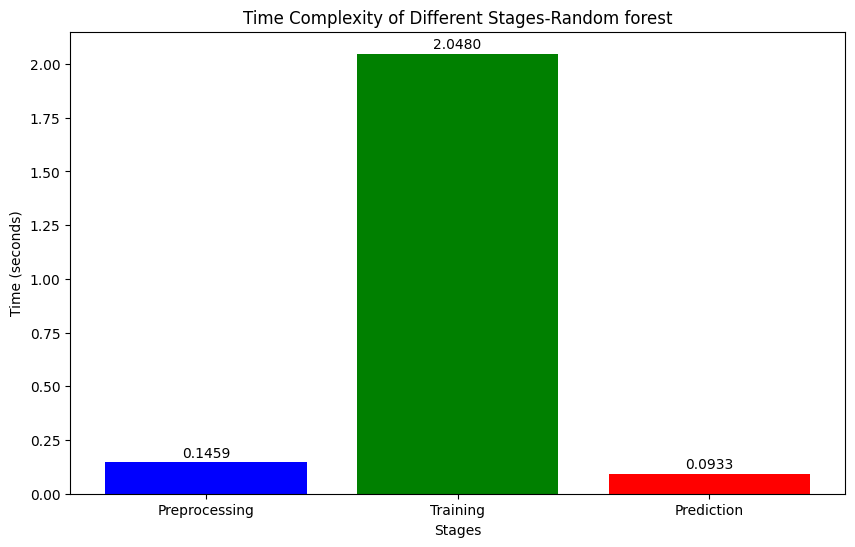

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages-Random forest')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


Accuracy: 0.9870
Precision: 0.9851
Recall: 0.9870
F1 Score: 0.9847
Preprocessing Time: 0.3888 seconds | Memory Usage: 6.77 MB
Training Time: 8.9380 seconds | Memory Usage: 0.12 MB
Prediction Time: 0.1718 seconds | Memory Usage: 0.05 MB


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.98453722 0.98541759 0.98475475 0.98431286 0.98232435]
Mean Cross-Validation Accuracy: 0.9843
Standard Deviation of Cross-Validation Accuracy: 0.0010


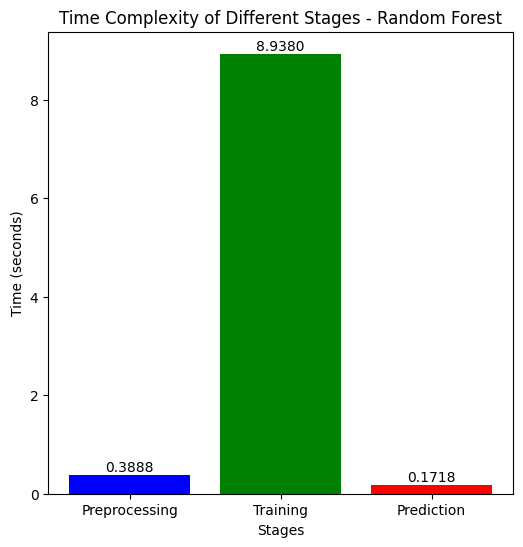

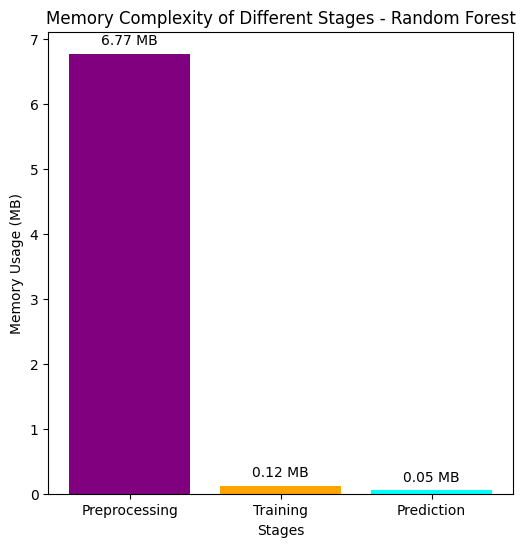

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import tracemalloc  # For measuring memory usage
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Measure preprocessing time and memory usage
tracemalloc.start()
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
preprocess_time = end_preprocess_time - start_preprocess_time
preprocess_memory_mb = preprocess_memory / (1024 * 1024)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Measure training time and memory usage
tracemalloc.start()
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
train_time = end_train_time - start_train_time
train_memory_mb = train_memory / (1024 * 1024)

# Measure prediction time and memory usage
tracemalloc.start()
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
predict_time = end_predict_time - start_predict_time
predict_memory_mb = predict_memory / (1024 * 1024)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Preprocessing Time: {preprocess_time:.4f} seconds | Memory Usage: {preprocess_memory_mb:.2f} MB')
print(f'Training Time: {train_time:.4f} seconds | Memory Usage: {train_memory_mb:.2f} MB')
print(f'Prediction Time: {predict_time:.4f} seconds | Memory Usage: {predict_memory_mb:.2f} MB')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(6, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages - Random Forest')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# Plot memory complexities
memory_usages = [preprocess_memory_mb, train_memory_mb, predict_memory_mb]

plt.figure(figsize=(6, 6))
plt.bar(labels, memory_usages, color=['purple', 'orange', 'cyan'])
plt.xlabel('Stages')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Complexity of Different Stages - Random Forest')
for i, v in enumerate(memory_usages):
    plt.text(i, v + 0.1, f'{v:.2f} MB', ha='center', va='bottom')
plt.show()


# Decision Tree-PSSO

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute per-class sensitivity and specificity
tp = np.diag(conf_matrix)
fn = np.sum(conf_matrix, axis=1) - tp
fp = np.sum(conf_matrix, axis=0) - tp
tn = np.sum(conf_matrix) - (tp + fn + fp)

sensitivity_per_class = tp / (tp + fn)
specificity_per_class = tn / (tn + fp)

# Compute overall sensitivity and specificity
overall_sensitivity = np.mean(sensitivity_per_class)
overall_specificity = np.mean(specificity_per_class)

# Compute error rate
error_rate = 1 - accuracy

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Overall Sensitivity: {overall_sensitivity:.4f}')
print(f'Overall Specificity: {overall_specificity:.4f}')
print(f'Error Rate: {error_rate:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9693
Precision: 0.9689
Recall (Sensitivity): 0.9693
F1 Score: 0.9688
Overall Sensitivity: 0.4537
Overall Specificity: 0.9695
Error Rate: 0.0307


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.96355202 0.96641626 0.96531153 0.96663721 0.96531153]
Mean Cross-Validation Accuracy: 0.9654
Standard Deviation of Cross-Validation Accuracy: 0.0011


Iteration 1/50, Best Fitness: 0.9850172877449097
Iteration 2/50, Best Fitness: 0.9857856319631195
Iteration 3/50, Best Fitness: 0.9863618901267768
Iteration 4/50, Best Fitness: 0.9863618901267768
Iteration 5/50, Best Fitness: 0.9863618901267768
Iteration 6/50, Best Fitness: 0.9863618901267768
Iteration 7/50, Best Fitness: 0.9863618901267768
Iteration 8/50, Best Fitness: 0.9863618901267768
Iteration 9/50, Best Fitness: 0.9863618901267768
Iteration 10/50, Best Fitness: 0.9863618901267768
Iteration 11/50, Best Fitness: 0.9863618901267768
Iteration 12/50, Best Fitness: 0.9863618901267768
Iteration 13/50, Best Fitness: 0.9863618901267768
Iteration 14/50, Best Fitness: 0.9863618901267768
Iteration 15/50, Best Fitness: 0.9863618901267768
Iteration 16/50, Best Fitness: 0.9863618901267768
Iteration 17/50, Best Fitness: 0.9863618901267768
Iteration 18/50, Best Fitness: 0.9863618901267768
Iteration 19/50, Best Fitness: 0.9863618901267768
Iteration 20/50, Best Fitness: 0.9863618901267768
Iteration

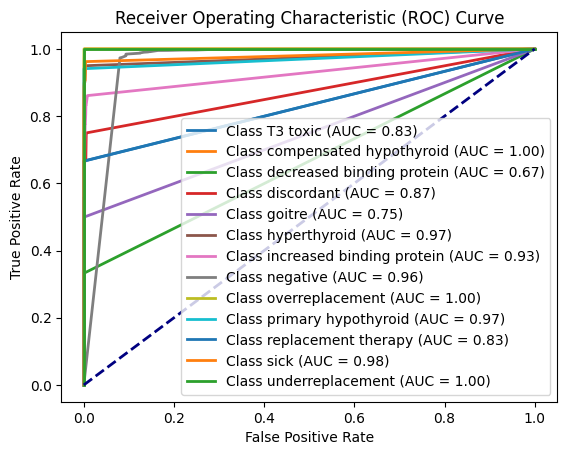

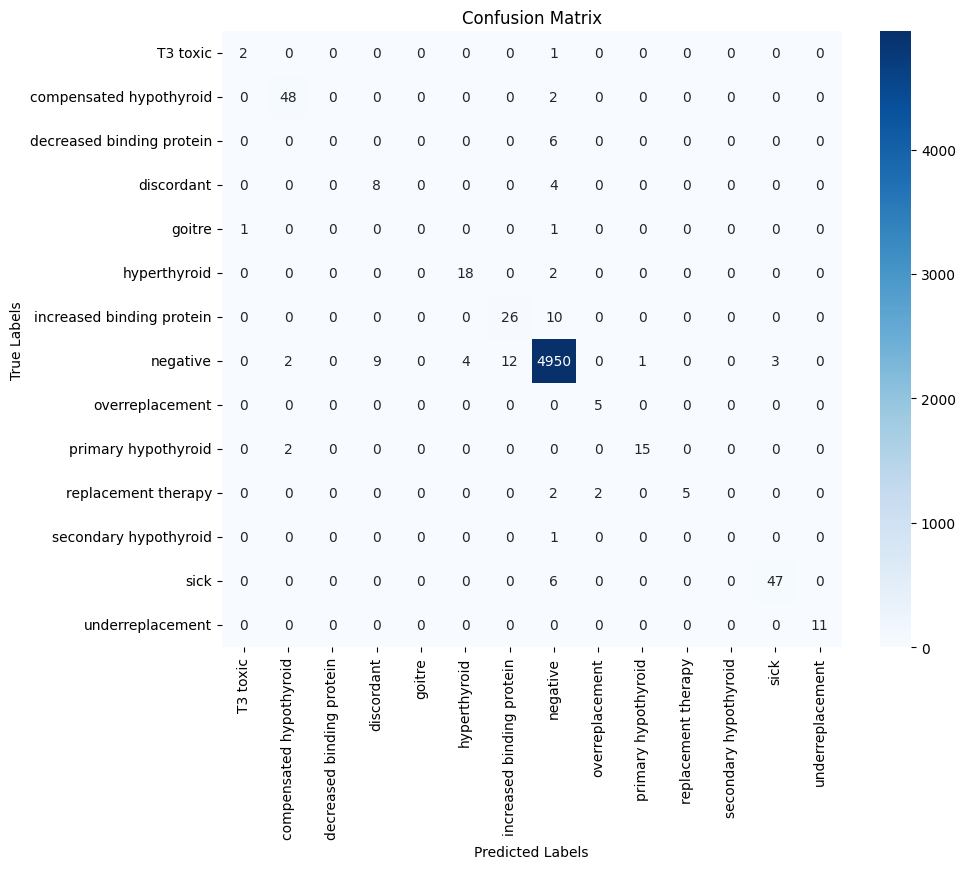

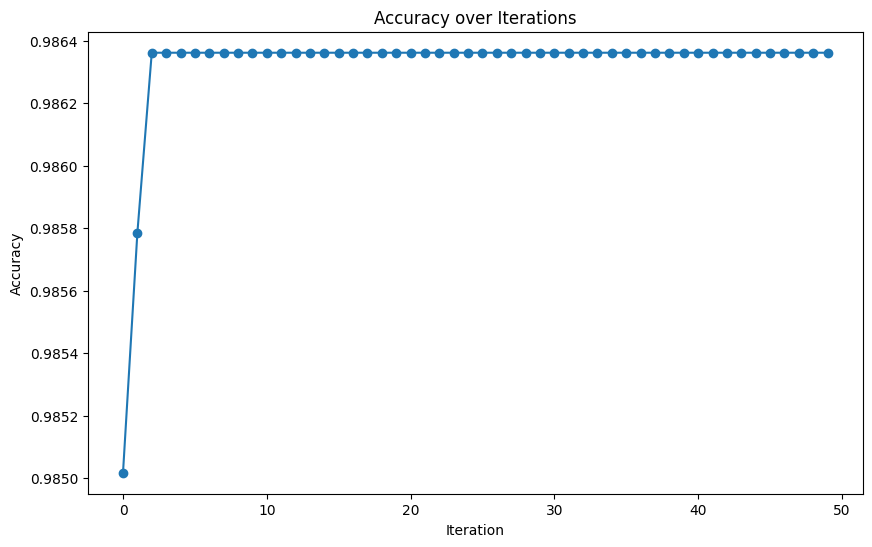

Classification Report:
                           precision    recall  f1-score   support

                 T3 toxic       0.67      0.67      0.67         3
  compensated hypothyroid       0.92      0.96      0.94        50
decreased binding protein       0.00      0.00      0.00         6
               discordant       0.47      0.67      0.55        12
                   goitre       0.00      0.00      0.00         2
             hyperthyroid       0.82      0.90      0.86        20
increased binding protein       0.68      0.72      0.70        36
                 negative       0.99      0.99      0.99      4981
          overreplacement       0.71      1.00      0.83         5
      primary hypothyroid       0.94      0.88      0.91        17
      replacement therapy       1.00      0.56      0.71         9
          secondary toxic       0.00      0.00      0.00         1
                     sick       0.94      0.89      0.91        53
         underreplacement       1.00  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


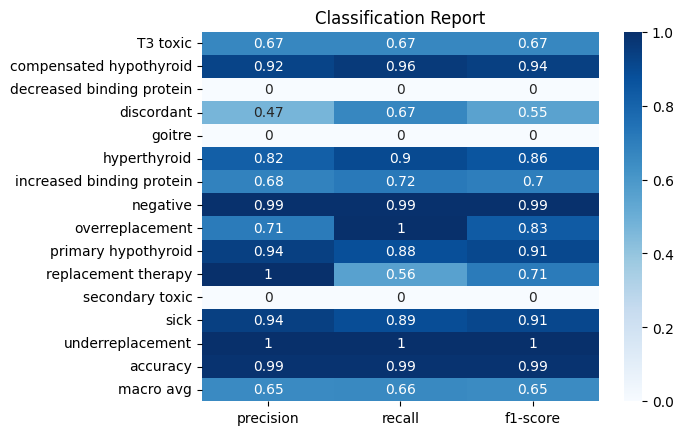

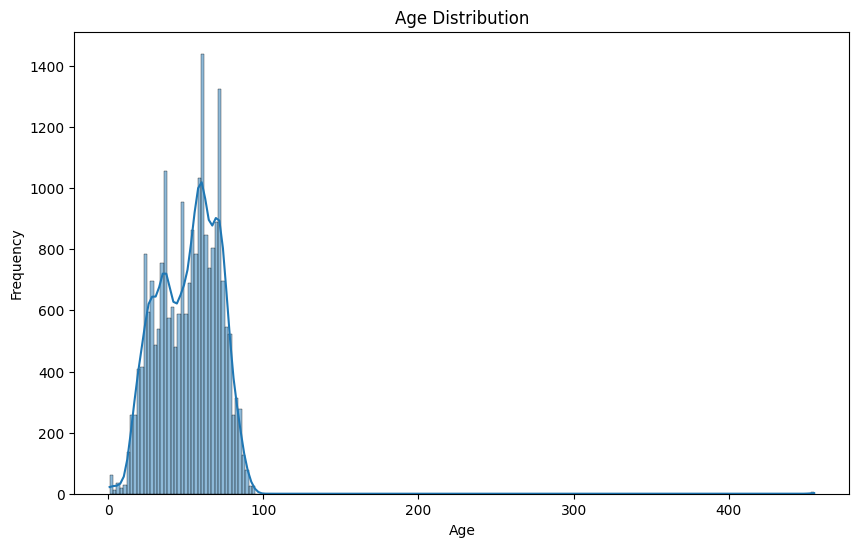

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

class HybridOptimizationAlgorithm:
    def __init__(self, num_particles, num_snakes, num_iterations, lower_bound, upper_bound, data, target):
        self.num_particles = num_particles
        self.num_snakes = num_snakes
        self.num_iterations = num_iterations
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.data = data
        self.target = target
        self.positions = np.random.uniform(lower_bound, upper_bound, (num_particles + num_snakes, 3))
        self.velocities = np.random.uniform(-1, 1, (num_particles, 3))
        self.best_positions = np.copy(self.positions)
        self.best_fitnesses = np.full(num_particles + num_snakes, float('-inf'))
        self.global_best_position = None
        self.global_best_fitness = float('-inf')
        self.fitness_over_time = []

    def fitness(self, position):
        max_depth = int(position[0])
        min_samples_split = int(position[1])
        min_samples_leaf = int(position[2])

        max_depth = max(1, max_depth)
        min_samples_split = max(2, min_samples_split)
        min_samples_leaf = max(1, min_samples_leaf)

        X_train, X_test, y_train, y_test = train_test_split(self.data, self.target, test_size=0.23, random_state=42)

        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split,
                                       min_samples_leaf=min_samples_leaf, random_state=42)
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        return accuracy_score(y_test, predictions)

    def optimize(self):
        for iteration in range(self.num_iterations):
            for i in range(len(self.positions)):
                fitness = self.fitness(self.positions[i])
                if fitness > self.best_fitnesses[i]:
                    self.best_fitnesses[i] = fitness
                    self.best_positions[i] = self.positions[i]

                if fitness > self.global_best_fitness:
                    self.global_best_fitness = fitness
                    self.global_best_position = self.positions[i]

            for i in range(self.num_snakes):
                step = np.random.uniform(-1, 1, 3)
                new_position = self.positions[i] + step
                new_position = np.clip(new_position, self.lower_bound, self.upper_bound)
                new_fitness = self.fitness(new_position)

                if new_fitness > self.best_fitnesses[i]:
                    self.positions[i] = new_position
                    self.best_fitnesses[i] = new_fitness

            w = 0.5
            c1 = 0.8
            c2 = 0.9
            for i in range(self.num_snakes, len(self.positions)):
                r1, r2 = np.random.rand(2)
                self.velocities[i - self.num_snakes] = (
                    w * self.velocities[i - self.num_snakes]
                    + c1 * r1 * (self.best_positions[i] - self.positions[i])
                    + c2 * r2 * (self.global_best_position - self.positions[i])
                )
                self.positions[i] += self.velocities[i - self.num_snakes]
                self.positions[i] = np.clip(self.positions[i], self.lower_bound, self.upper_bound)

            self.fitness_over_time.append(self.global_best_fitness)
            print(f'Iteration {iteration+1}/{self.num_iterations}, Best Fitness: {self.global_best_fitness}')

        return self.global_best_position, self.global_best_fitness

def plot_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='Blues')
    plt.title('Classification Report')
    plt.show()

def plot_age_distribution(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['age'], kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

def plot_accuracy_over_iterations(fitness_over_time):
    plt.figure(figsize=(10, 6))
    plt.plot(fitness_over_time, marker='o')
    plt.title('Accuracy over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.show()

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')
X = data.drop('class', axis=1)
y = data['class']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Run optimization
hoa = HybridOptimizationAlgorithm(num_particles=10, num_snakes=10, num_iterations=50,
                                  lower_bound=1, upper_bound=50, data=X_preprocessed, target=y)
best_position, best_fitness = hoa.optimize()
print(f'Best Position: {best_position}, Best Fitness: {best_fitness}')

# Train final Decision Tree with best parameters
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.23, random_state=42)

best_max_depth = max(1, int(best_position[0]))
best_min_samples_split = max(2, int(best_position[1]))
best_min_samples_leaf = max(1, int(best_position[2]))

final_model = DecisionTreeClassifier(max_depth=best_max_depth,
                                     min_samples_split=best_min_samples_split,
                                     min_samples_leaf=best_min_samples_leaf,
                                     random_state=42)
final_model.fit(X_train, y_train)

# Predictions and metrics
final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
final_precision = precision_score(y_test, final_predictions, average='weighted', zero_division=0)
final_recall = recall_score(y_test, final_predictions, average='weighted')
final_f1 = f1_score(y_test, final_predictions, average='weighted')

conf_matrix = confusion_matrix(y_test, final_predictions)

sensitivity_per_class = recall_score(y_test, final_predictions, average=None)
specificity_per_class = []

for i in range(len(conf_matrix)):
    tn = np.sum(conf_matrix) - (np.sum(conf_matrix[i, :]) + np.sum(conf_matrix[:, i]) - conf_matrix[i, i])
    fp = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity = tn / (tn + fp)
    specificity_per_class.append(specificity)

# ROC AUC (if binary/multiclass probabilities)
y_prob = final_model.predict_proba(X_test)
roc_auc_dict = {}
y_test_binarized = pd.get_dummies(y_test)
y_test_binarized = y_test_binarized.reindex(columns=final_model.classes_, fill_value=0)

for class_label in final_model.classes_:
    y_true = y_test_binarized[class_label]
    y_score = y_prob[:, list(final_model.classes_).index(class_label)]
    if len(np.unique(y_true)) == 2:
        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc = roc_auc_score(y_true, y_score)
        roc_auc_dict[class_label] = (fpr, tpr, auc)

# Print metrics
print(f'Final Model Accuracy: {final_accuracy}')
print(f'Final Model Precision: {final_precision}')
print(f'Final Model Recall: {final_recall}')
print(f'Final Model F1 Score: {final_f1}')
print(f'Sensitivity per class: {sensitivity_per_class}')
print(f'Specificity per class: {specificity_per_class}')
print(f'AUC: {roc_auc_dict}')

# Plot ROC
plt.figure()
for class_label, (fpr, tpr, auc) in roc_auc_dict.items():
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=final_model.classes_, yticklabels=final_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot optimization fitness
plot_accuracy_over_iterations(hoa.fitness_over_time)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, final_predictions, zero_division=0))
plot_classification_report(y_test, final_predictions)

# Age Distribution (if exists)
if 'age' in data.columns:
    plot_age_distribution(data)
else:
    print("The 'age' column is not available in the dataset.")


Accuracy: 0.9851
Precision: 0.9843
Recall: 0.9851
F1 Score: 0.9845


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.98409543 0.98365002 0.98563853 0.98696421 0.9845338 ]
Mean Cross-Validation Accuracy: 0.9850
Standard Deviation of Cross-Validation Accuracy: 0.0012
Preprocessing Time: 0.1255 seconds
Training Time: 0.0809 seconds
Prediction Time: 0.0027 seconds


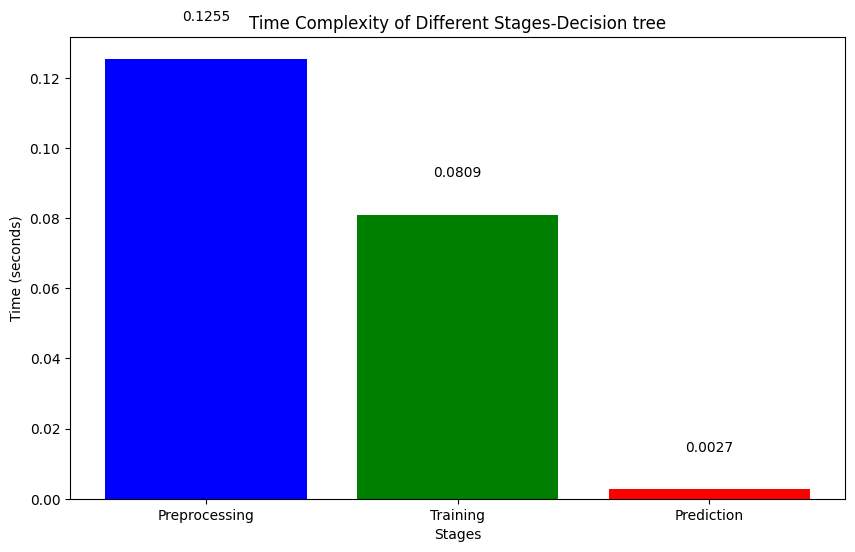

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.5, stratify=y, random_state=42)

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages-Decision tree')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


Accuracy: 0.9856
Precision: 0.9839
Recall: 0.9856
F1 Score: 0.9846
Preprocessing Time: 0.4398 seconds | Memory Usage: 6.77 MB
Training Time: 0.3904 seconds | Memory Usage: 0.01 MB
Prediction Time: 0.0114 seconds | Memory Usage: 0.04 MB


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.98409543 0.98365002 0.98563853 0.98696421 0.9845338 ]
Mean Cross-Validation Accuracy: 0.9850
Standard Deviation of Cross-Validation Accuracy: 0.0012


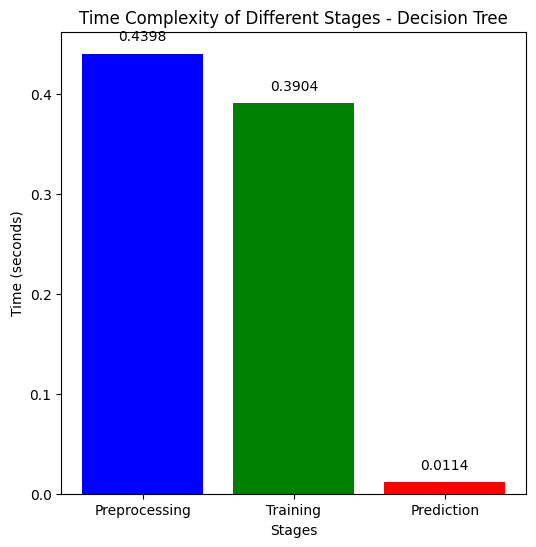

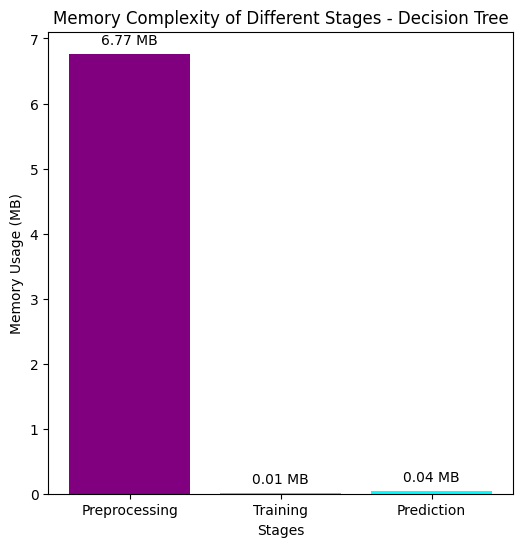

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import tracemalloc  # For memory usage measurement
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Measure preprocessing time and memory usage
tracemalloc.start()
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
preprocess_time = end_preprocess_time - start_preprocess_time
preprocess_memory_mb = preprocess_memory / (1024 * 1024)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Measure training time and memory usage
tracemalloc.start()
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
train_time = end_train_time - start_train_time
train_memory_mb = train_memory / (1024 * 1024)

# Measure prediction time and memory usage
tracemalloc.start()
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
predict_time = end_predict_time - start_predict_time
predict_memory_mb = predict_memory / (1024 * 1024)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Preprocessing Time: {preprocess_time:.4f} seconds | Memory Usage: {preprocess_memory_mb:.2f} MB')
print(f'Training Time: {train_time:.4f} seconds | Memory Usage: {train_memory_mb:.2f} MB')
print(f'Prediction Time: {predict_time:.4f} seconds | Memory Usage: {predict_memory_mb:.2f} MB')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(6, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages - Decision Tree')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# Plot memory complexities
memory_usages = [preprocess_memory_mb, train_memory_mb, predict_memory_mb]

plt.figure(figsize=(6, 6))
plt.bar(labels, memory_usages, color=['purple', 'orange', 'cyan'])
plt.xlabel('Stages')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Complexity of Different Stages - Decision Tree')
for i, v in enumerate(memory_usages):
    plt.text(i, v + 0.1, f'{v:.2f} MB', ha='center', va='bottom')
plt.show()


# SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = SVC(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9571
Precision: 0.9235
Recall: 0.9571
F1 Score: 0.9380
Cross-Validation Accuracy Scores: [0.9582505  0.95713654 0.95669465 0.95802033 0.95713654]
Mean Cross-Validation Accuracy: 0.9574
Standard Deviation of Cross-Validation Accuracy: 0.0006


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

class HybridOptimizationAlgorithmSVM:
    def __init__(self, num_particles, num_snakes, num_iterations, data, target):
        self.num_particles = num_particles
        self.num_snakes = num_snakes
        self.num_iterations = num_iterations
        self.data = data
        self.target = target
        self.positions = np.random.uniform([0.01, 0.0001, 0], [100, 1, 3], (num_particles + num_snakes, 3))  # C, gamma, kernel_index
        self.velocities = np.random.uniform(-1, 1, (num_particles, 3))
        self.best_positions = np.copy(self.positions)
        self.best_fitnesses = np.full(num_particles + num_snakes, float('-inf'))
        self.global_best_position = None
        self.global_best_fitness = float('-inf')
        self.fitness_over_time = []
        self.kernel_list = ['linear', 'rbf', 'poly', 'sigmoid']

    def fitness(self, position):
        C = position[0]
        gamma = position[1]
        kernel_idx = int(position[2]) % 4
        kernel = self.kernel_list[kernel_idx]

        C = max(0.01, C)
        gamma = max(1e-5, gamma)

        X_train, X_test, y_train, y_test = train_test_split(self.data, self.target, test_size=0.2, random_state=42)

        try:
            model = SVC(C=C, gamma=gamma, kernel=kernel, probability=True, random_state=42)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            return accuracy_score(y_test, predictions)
        except:
            return 0

    def optimize(self):
        for iteration in range(self.num_iterations):
            for i in range(len(self.positions)):
                fitness = self.fitness(self.positions[i])
                if fitness > self.best_fitnesses[i]:
                    self.best_fitnesses[i] = fitness
                    self.best_positions[i] = self.positions[i]

                if fitness > self.global_best_fitness:
                    self.global_best_fitness = fitness
                    self.global_best_position = self.positions[i]

            for i in range(self.num_snakes):
                step = np.random.uniform(-1, 1, 3)
                new_position = self.positions[i] + step
                new_position[:, 2] = np.clip(new_position[:, 2], 0, 3)
                new_fitness = self.fitness(new_position)

                if new_fitness > self.best_fitnesses[i]:
                    self.positions[i] = new_position
                    self.best_fitnesses[i] = new_fitness

            w, c1, c2 = 0.5, 0.8, 0.9
            for i in range(self.num_snakes, len(self.positions)):
                r1, r2 = np.random.rand(2)
                self.velocities[i - self.num_snakes] = (
                    w * self.velocities[i - self.num_snakes]
                    + c1 * r1 * (self.best_positions[i] - self.positions[i])
                    + c2 * r2 * (self.global_best_position - self.positions[i])
                )
                self.positions[i] += self.velocities[i - self.num_snakes]
                self.positions[i][:2] = np.clip(self.positions[i][:2], [0.01, 0.0001], [100, 1])
                self.positions[i][2] = np.clip(self.positions[i][2], 0, 3)

            self.fitness_over_time.append(self.global_best_fitness)
            print(f'Iteration {iteration + 1}/{self.num_iterations}, Best Fitness: {self.global_best_fitness}')

        return self.global_best_position, self.global_best_fitness

# Utility functions
def plot_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='Blues')
    plt.title('Classification Report')
    plt.show()

def plot_accuracy_over_iterations(fitness_over_time):
    plt.figure(figsize=(10, 6))
    plt.plot(fitness_over_time, marker='o')
    plt.title('Accuracy over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.show()

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')
X = data.drop('class', axis=1)
y = data['class']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Optimize SVM
optimizer = HybridOptimizationAlgorithmSVM(
    num_particles=10,
    num_snakes=10,
    num_iterations=30,
    data=X_preprocessed,
    target=y
)

best_position, best_fitness = optimizer.optimize()
C, gamma, kernel_idx = best_position
kernel = optimizer.kernel_list[int(kernel_idx) % 4]

print(f"Best SVM Hyperparameters:\nC={C}, gamma={gamma}, kernel={kernel}")

# Train final SVM
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
final_model = SVC(C=C, gamma=gamma, kernel=kernel, probability=True, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot classification results
plot_classification_report(y_test, y_pred)

# ROC Curves
y_test_binarized = pd.get_dummies(y_test)
y_test_binarized = y_test_binarized.reindex(columns=final_model.classes_, fill_value=0)

plt.figure(figsize=(10, 6))
for idx, class_label in enumerate(final_model.classes_):
    y_true_bin = y_test_binarized[class_label]
    y_score_bin = y_prob[:, idx]
    if len(np.unique(y_true_bin)) > 1:
        fpr, tpr, _ = roc_curve(y_true_bin, y_score_bin)
        auc = roc_auc_score(y_true_bin, y_score_bin)
        plt.plot(fpr, tpr, label=f'Class {class_label} (AUC={auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=final_model.classes_, yticklabels=final_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Fitness Progress
plot_accuracy_over_iterations(optimizer.fitness_over_time)


# 50,40,30,20,10

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9596
Precision: 0.9327
Recall: 0.9596
F1 Score: 0.9412
Cross-Validation Accuracy Scores: [0.96355202 0.96266019 0.96133451 0.96266019 0.96155546]
Mean Cross-Validation Accuracy: 0.9624
Standard Deviation of Cross-Validation Accuracy: 0.0008
Preprocessing Time: 0.1298 seconds
Training Time: 8.9798 seconds
Prediction Time: 1.5446 seconds


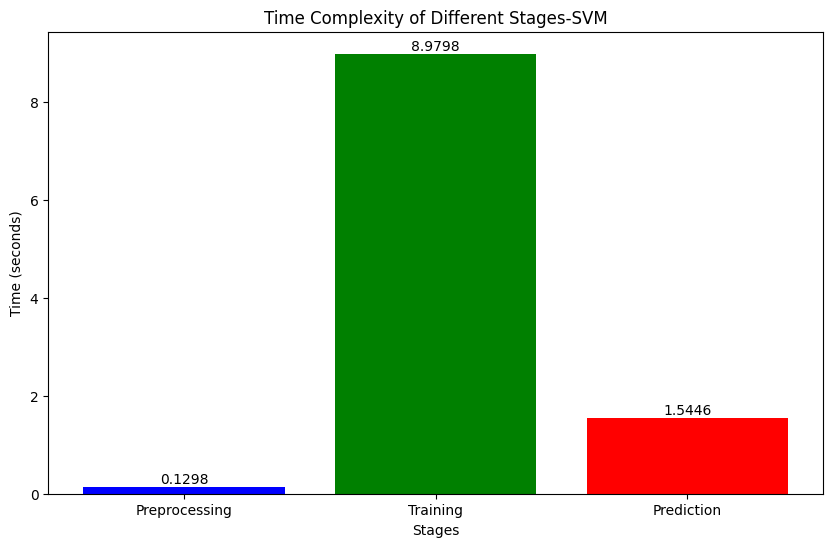

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.5, stratify=y, random_state=42)

# Initialize the model
model = SVC(probability=True, random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages-SVM')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9608
Precision: 0.9382
Recall: 0.9608
F1 Score: 0.9435
Cross-Validation Accuracy Scores: [0.96355202 0.96266019 0.96133451 0.96266019 0.96155546]
Mean Cross-Validation Accuracy: 0.9624
Standard Deviation of Cross-Validation Accuracy: 0.0008
Preprocessing Time: 0.1048 seconds
Training Time: 19.3963 seconds
Prediction Time: 1.4575 seconds


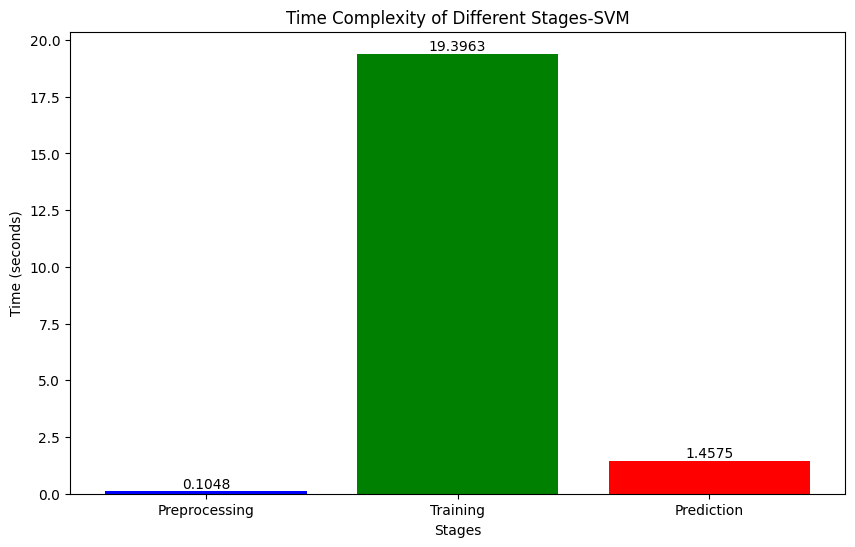

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.4, stratify=y, random_state=42)

# Initialize the model
model = SVC(probability=True, random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages-SVM')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9622
Precision: 0.9460
Recall: 0.9622
F1 Score: 0.9462
Cross-Validation Accuracy Scores: [0.96355202 0.96266019 0.96133451 0.96266019 0.96155546]
Mean Cross-Validation Accuracy: 0.9624
Standard Deviation of Cross-Validation Accuracy: 0.0008
Preprocessing Time: 0.1308 seconds
Training Time: 21.0804 seconds
Prediction Time: 1.2358 seconds


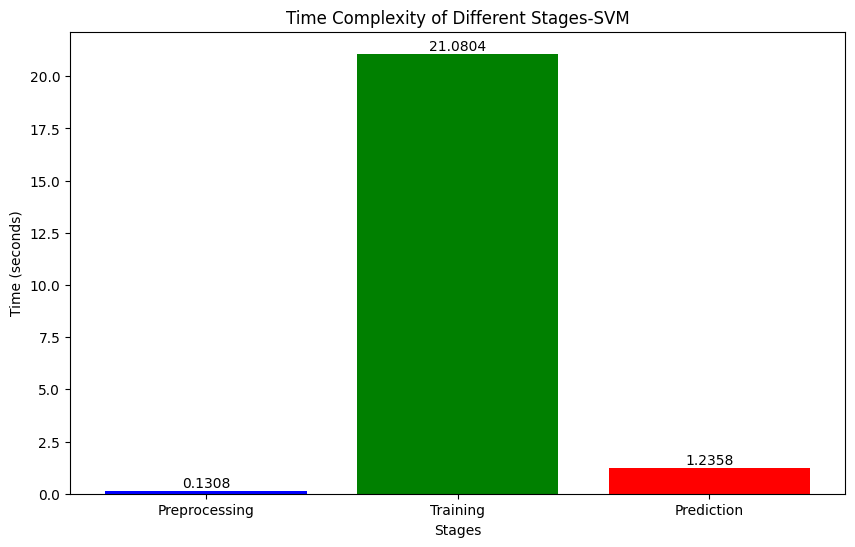

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, stratify=y, random_state=42)

# Initialize the model
model = SVC(probability=True, random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages-SVM')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9636
Precision: 0.9516
Recall: 0.9636
F1 Score: 0.9485
Cross-Validation Accuracy Scores: [0.96355202 0.96266019 0.96133451 0.96266019 0.96155546]
Mean Cross-Validation Accuracy: 0.9624
Standard Deviation of Cross-Validation Accuracy: 0.0008
Preprocessing Time: 0.1238 seconds
Training Time: 29.7359 seconds
Prediction Time: 1.0193 seconds


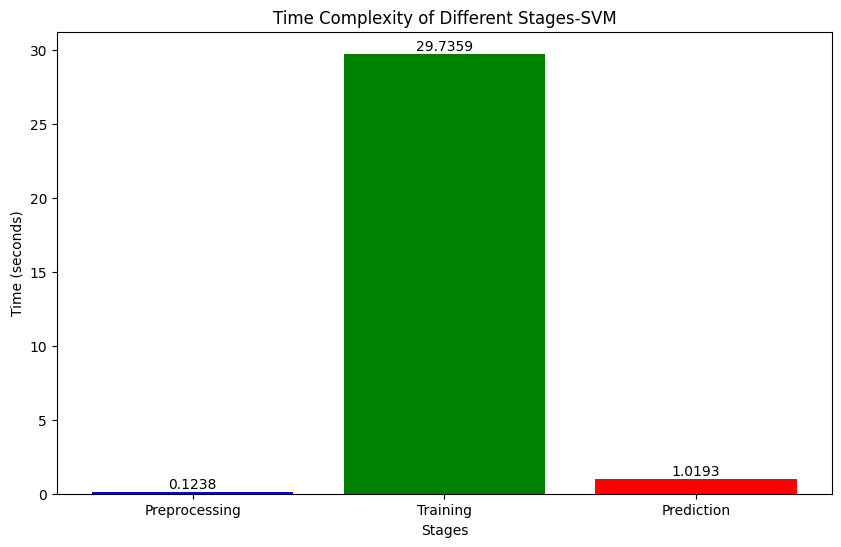

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = SVC(probability=True, random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages-SVM')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9660
Precision: 0.9543
Recall: 0.9660
F1 Score: 0.9523
Cross-Validation Accuracy Scores: [0.96355202 0.96266019 0.96133451 0.96266019 0.96155546]
Mean Cross-Validation Accuracy: 0.9624
Standard Deviation of Cross-Validation Accuracy: 0.0008
Preprocessing Time: 0.1325 seconds
Training Time: 43.9952 seconds
Prediction Time: 0.5272 seconds


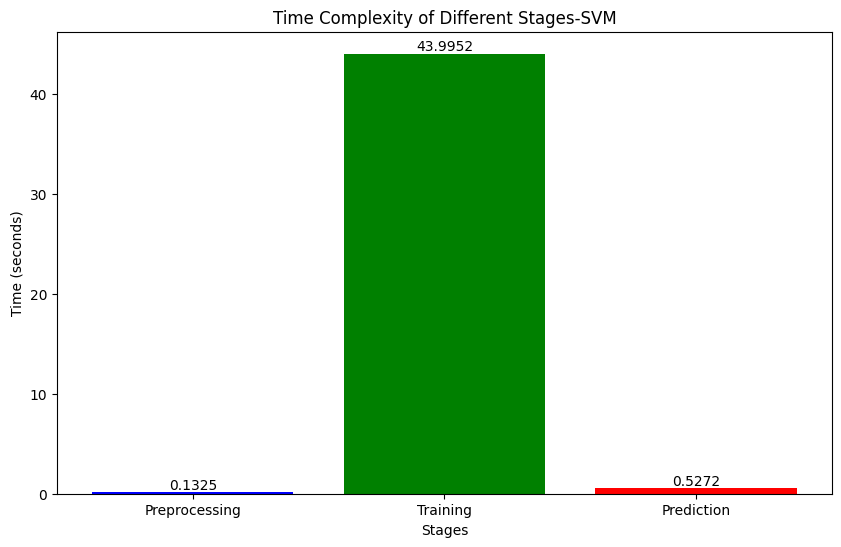

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.1, stratify=y, random_state=42)

# Initialize the model
model = SVC(probability=True, random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages-SVM')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9636
Precision: 0.9516
Recall: 0.9636
F1 Score: 0.9485
Cross-Validation Accuracy Scores: [0.96355202 0.96266019 0.96133451 0.96266019 0.96155546]
Mean Cross-Validation Accuracy: 0.9624
Standard Deviation of Cross-Validation Accuracy: 0.0008
Preprocessing Time: 0.3116 seconds
Training Time: 42.0127 seconds
Prediction Time: 1.6625 seconds


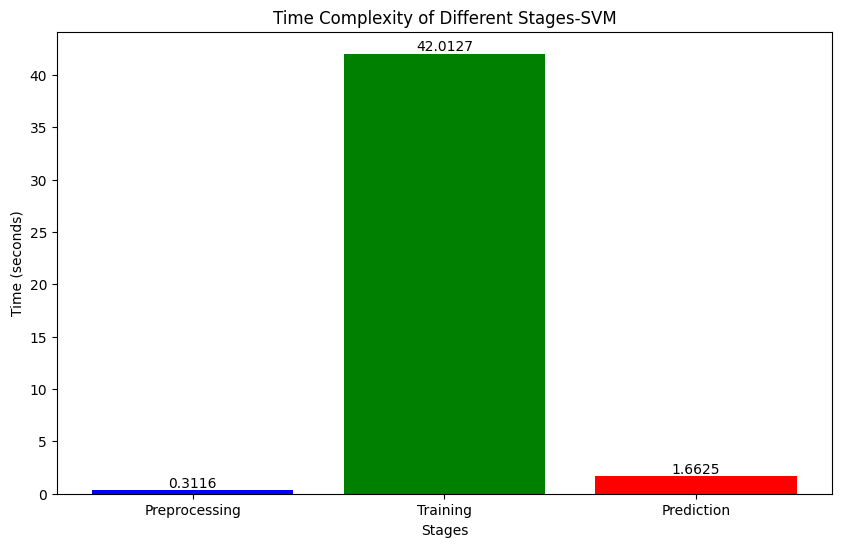

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = SVC(probability=True, random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(6, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages-SVM')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


# KNN-PSSO

# KNN Time Complexity

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9617
Precision: 0.9499
Recall: 0.9617
F1 Score: 0.9484
Cross-Validation Accuracy Scores: [0.96399381 0.96332302 0.96332302 0.96332302 0.96111357]
Mean Cross-Validation Accuracy: 0.9630
Standard Deviation of Cross-Validation Accuracy: 0.0010
Preprocessing Time: 0.2128 seconds
Training Time: 0.0146 seconds
Prediction Time: 1.5396 seconds


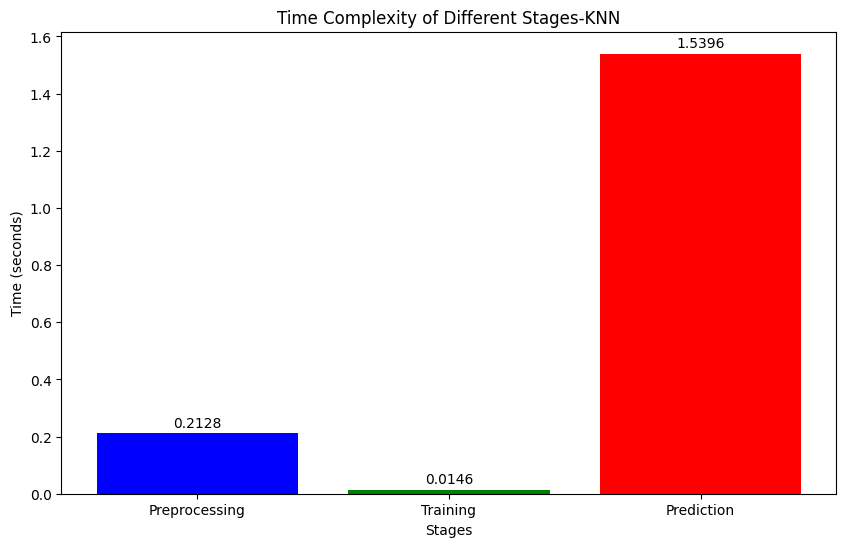

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.5, stratify=y, random_state=42)

# Initialize the model
model = KNeighborsClassifier()

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages-KNN')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9630
Precision: 0.9504
Recall: 0.9630
F1 Score: 0.9504
Cross-Validation Accuracy Scores: [0.96399381 0.96332302 0.96332302 0.96332302 0.96111357]
Mean Cross-Validation Accuracy: 0.9630
Standard Deviation of Cross-Validation Accuracy: 0.0010
Preprocessing Time: 0.1315 seconds
Training Time: 0.0144 seconds
Prediction Time: 1.1018 seconds


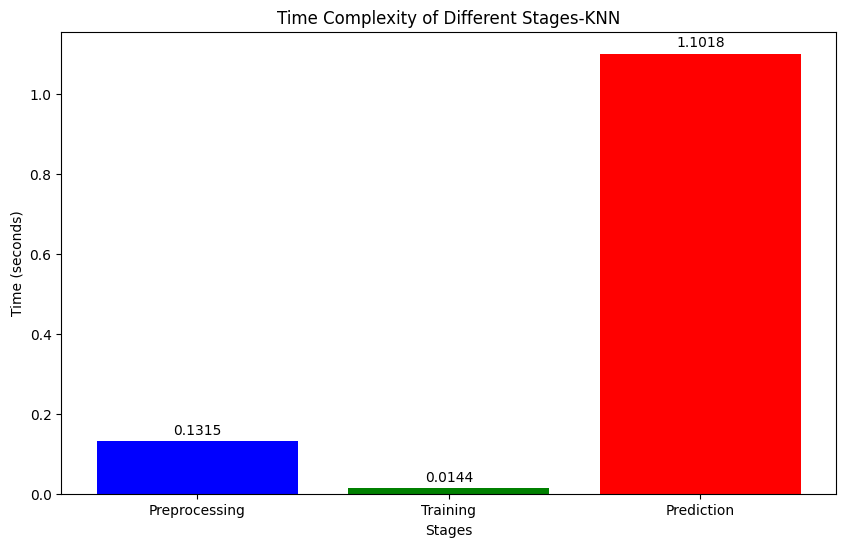

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.4, stratify=y, random_state=42)

# Initialize the model
model = KNeighborsClassifier()

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages-KNN')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9638
Precision: 0.9533
Recall: 0.9638
F1 Score: 0.9515
Cross-Validation Accuracy Scores: [0.96399381 0.96332302 0.96332302 0.96332302 0.96111357]
Mean Cross-Validation Accuracy: 0.9630
Standard Deviation of Cross-Validation Accuracy: 0.0010
Preprocessing Time: 0.1476 seconds
Training Time: 0.0166 seconds
Prediction Time: 1.3215 seconds


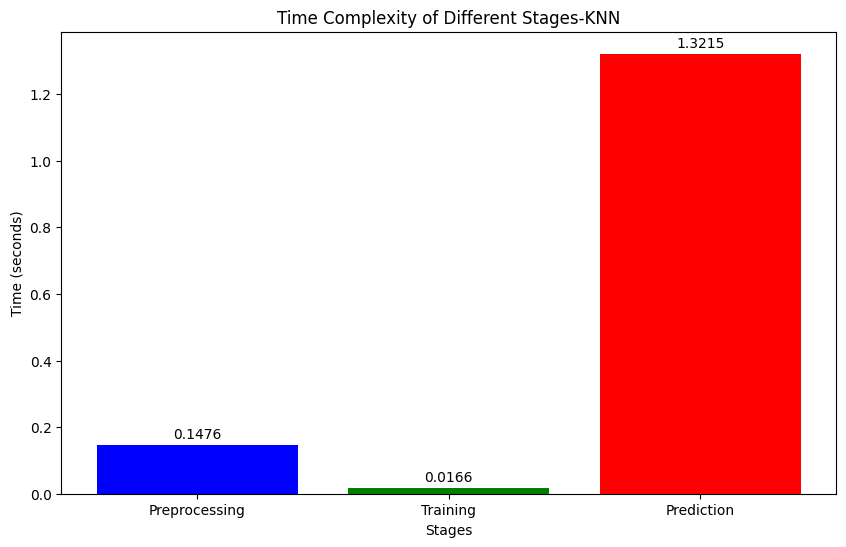

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, stratify=y, random_state=42)

# Initialize the model
model = KNeighborsClassifier()

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages-KNN')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9651
Precision: 0.9575
Recall: 0.9651
F1 Score: 0.9540
Cross-Validation Accuracy Scores: [0.96399381 0.96332302 0.96332302 0.96332302 0.96111357]
Mean Cross-Validation Accuracy: 0.9630
Standard Deviation of Cross-Validation Accuracy: 0.0010
Preprocessing Time: 0.1109 seconds
Training Time: 0.0176 seconds
Prediction Time: 0.9578 seconds


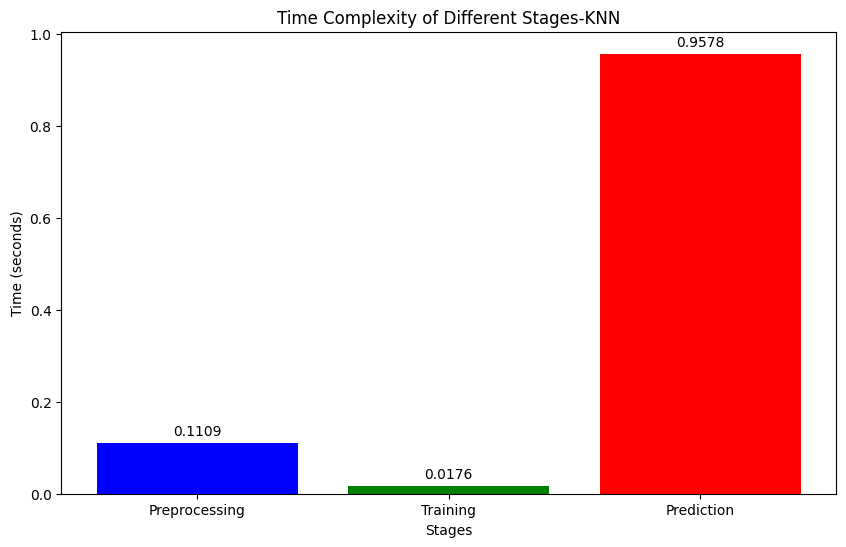

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = KNeighborsClassifier()

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages-KNN')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9669
Precision: 0.9549
Recall: 0.9669
F1 Score: 0.9551
Cross-Validation Accuracy Scores: [0.96399381 0.96332302 0.96332302 0.96332302 0.96111357]
Mean Cross-Validation Accuracy: 0.9630
Standard Deviation of Cross-Validation Accuracy: 0.0010
Preprocessing Time: 0.1057 seconds
Training Time: 0.0223 seconds
Prediction Time: 0.3612 seconds


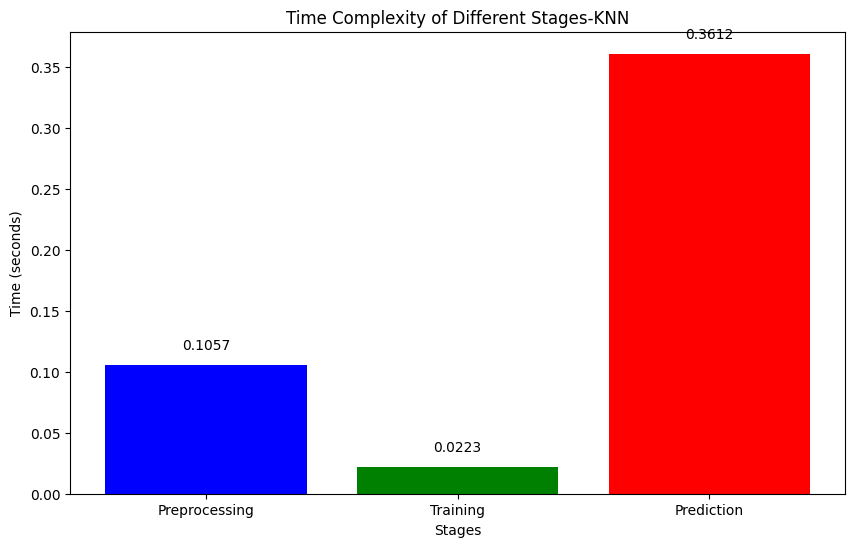

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.1, stratify=y, random_state=42)

# Initialize the model
model = KNeighborsClassifier()

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages-KNN')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


In [ ]:
import tracemalloc

# Measure Preprocessing Memory Usage
tracemalloc.start()
# Add your preprocessing code here (replace with actual code used for preprocessing)
X_preprocessed = preprocessor.fit_transform(X)  # This line should match your actual code
preprocess_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Measure Training Memory Usage
tracemalloc.start()
# Add your training code here (replace with actual code for model training)
model.fit(X_train, y_train)
train_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Measure Prediction Memory Usage
tracemalloc.start()
# Add your prediction code here (replace with actual code for prediction)
y_pred = model.predict(X_test)
predict_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Convert memory from bytes to MB
preprocess_memory_mb = preprocess_memory / (1024 * 1024)
train_memory_mb = train_memory / (1024 * 1024)
predict_memory_mb = predict_memory / (1024 * 1024)

# Print memory usage for each stage
print(f'Preprocessing Memory Usage: {preprocess_memory_mb:.2f} MB')
print(f'Training Memory Usage: {train_memory_mb:.2f} MB')
print(f'Prediction Memory Usage: {predict_memory_mb:.2f} MB')


Preprocessing Memory Usage: 6.76 MB
Training Memory Usage: 0.14 MB
Prediction Memory Usage: 0.06 MB


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9651
Precision: 0.9575
Recall: 0.9651
F1 Score: 0.9540


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.96399381 0.96332302 0.96332302 0.96332302 0.96111357]
Mean Cross-Validation Accuracy: 0.9630
Standard Deviation of Cross-Validation Accuracy: 0.0010
Preprocessing Time: 0.2318 seconds
Training Time: 0.1188 seconds
Prediction Time: 3.6590 seconds


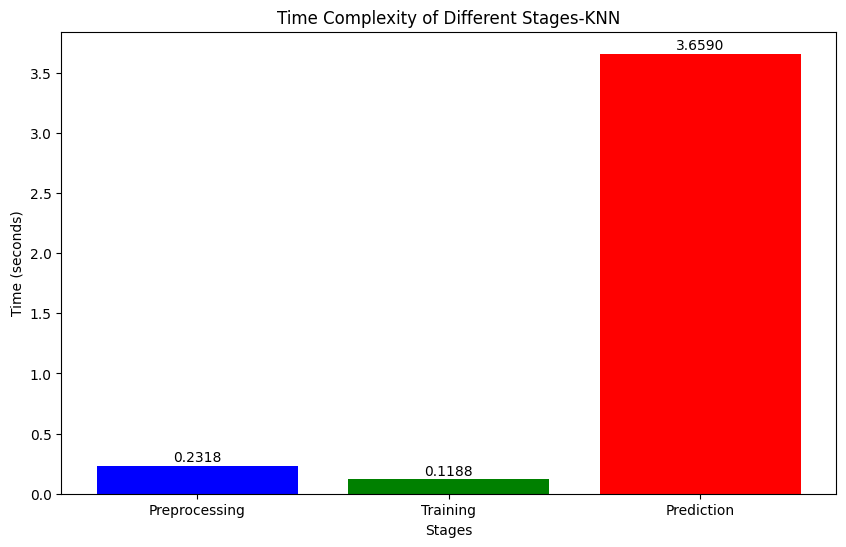

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = KNeighborsClassifier()

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages-KNN')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


# SPACE COMPLEXITY KNN

Accuracy: 0.9651
Precision: 0.9575
Recall: 0.9651
F1 Score: 0.9540
Preprocessing Time: 1.0197 seconds | Memory Usage: 6.78 MB
Training Time: 0.1715 seconds | Memory Usage: 0.15 MB
Prediction Time: 3.1865 seconds | Memory Usage: 0.04 MB


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.96399381 0.96332302 0.96332302 0.96332302 0.96111357]
Mean Cross-Validation Accuracy: 0.9630
Standard Deviation of Cross-Validation Accuracy: 0.0010


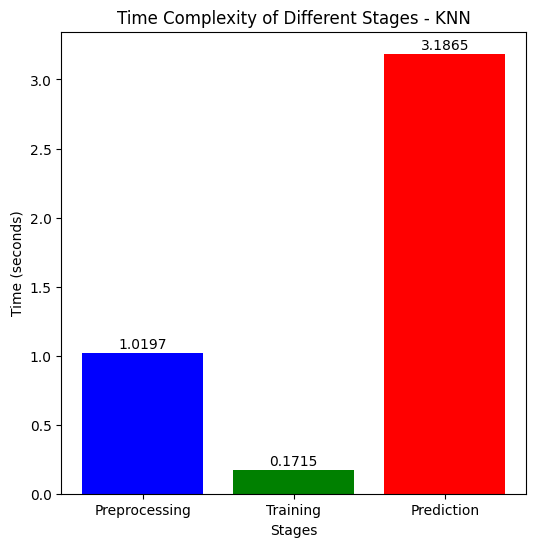

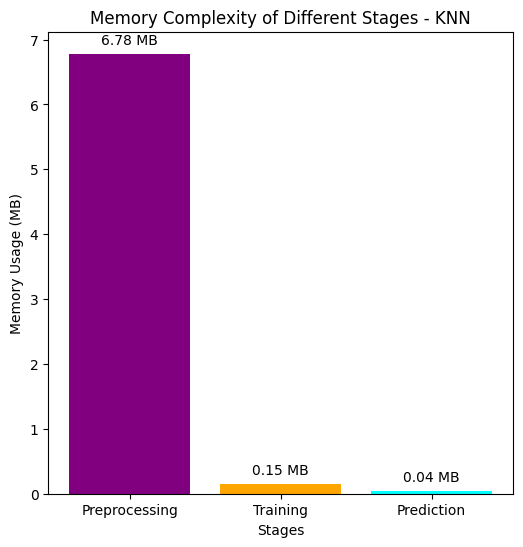

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt
import tracemalloc  # For measuring memory usage

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Measure preprocessing time and memory usage
tracemalloc.start()
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_memory, _ = tracemalloc.get_traced_memory()  # Memory in bytes
tracemalloc.stop()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = KNeighborsClassifier()

# Measure training time and memory usage
tracemalloc.start()
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_memory, _ = tracemalloc.get_traced_memory()  # Memory in bytes
tracemalloc.stop()
train_time = end_train_time - start_train_time

# Measure prediction time and memory usage
tracemalloc.start()
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_memory, _ = tracemalloc.get_traced_memory()  # Memory in bytes
tracemalloc.stop()
predict_time = end_predict_time - start_predict_time

# Convert memory usage from bytes to megabytes
preprocess_memory_mb = preprocess_memory / (1024 * 1024)
train_memory_mb = train_memory / (1024 * 1024)
predict_memory_mb = predict_memory / (1024 * 1024)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Preprocessing Time: {preprocess_time:.4f} seconds | Memory Usage: {preprocess_memory_mb:.2f} MB')
print(f'Training Time: {train_time:.4f} seconds | Memory Usage: {train_memory_mb:.2f} MB')
print(f'Prediction Time: {predict_time:.4f} seconds | Memory Usage: {predict_memory_mb:.2f} MB')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
memory_usages = [preprocess_memory_mb, train_memory_mb, predict_memory_mb]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(6, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages - KNN')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# Plot memory complexities
plt.figure(figsize=(6, 6))
plt.bar(labels, memory_usages, color=['purple', 'orange', 'cyan'])
plt.xlabel('Stages')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Complexity of Different Stages - KNN')
for i, v in enumerate(memory_usages):
    plt.text(i, v + 0.1, f'{v:.2f} MB', ha='center', va='bottom')
plt.show()


Accuracy: 0.8332
Precision: 0.8024
Recall: 0.8332
F1 Score: 0.8036
Preprocessing Time: 0.6881 seconds | Memory Usage: 3.96 MB
Training Time: 0.0169 seconds | Memory Usage: 0.06 MB
Prediction Time: 0.2194 seconds | Memory Usage: 0.02 MB


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.84023991 0.84732824 0.84124386 0.83524277 0.83742499]
Mean Cross-Validation Accuracy: 0.8403
Standard Deviation of Cross-Validation Accuracy: 0.0041


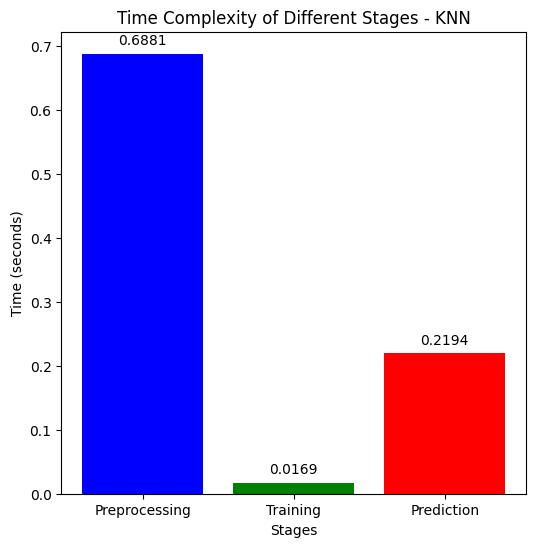

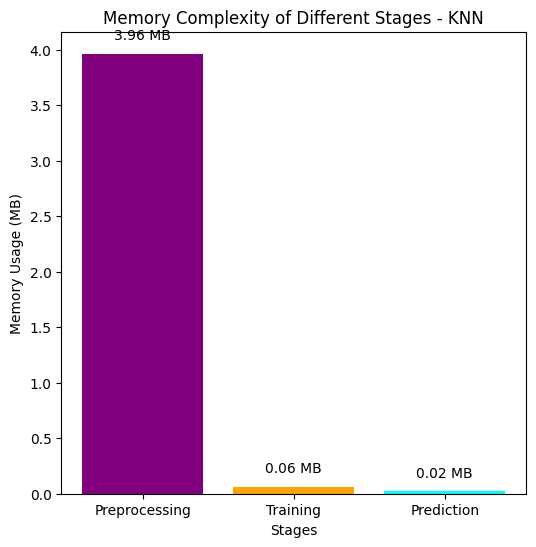

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt
import tracemalloc  # For measuring memory usage

# Load and preprocess data
data = pd.read_csv('/content/thyroidDF.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['target'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('target', axis=1)
y = filtered_data['target']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Measure preprocessing time and memory usage
tracemalloc.start()
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_memory, _ = tracemalloc.get_traced_memory()  # Memory in bytes
tracemalloc.stop()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = KNeighborsClassifier()

# Measure training time and memory usage
tracemalloc.start()
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_memory, _ = tracemalloc.get_traced_memory()  # Memory in bytes
tracemalloc.stop()
train_time = end_train_time - start_train_time

# Measure prediction time and memory usage
tracemalloc.start()
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_memory, _ = tracemalloc.get_traced_memory()  # Memory in bytes
tracemalloc.stop()
predict_time = end_predict_time - start_predict_time

# Convert memory usage from bytes to megabytes
preprocess_memory_mb = preprocess_memory / (1024 * 1024)
train_memory_mb = train_memory / (1024 * 1024)
predict_memory_mb = predict_memory / (1024 * 1024)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Preprocessing Time: {preprocess_time:.4f} seconds | Memory Usage: {preprocess_memory_mb:.2f} MB')
print(f'Training Time: {train_time:.4f} seconds | Memory Usage: {train_memory_mb:.2f} MB')
print(f'Prediction Time: {predict_time:.4f} seconds | Memory Usage: {predict_memory_mb:.2f} MB')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
memory_usages = [preprocess_memory_mb, train_memory_mb, predict_memory_mb]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(6, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages - KNN')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# Plot memory complexities
plt.figure(figsize=(6, 6))
plt.bar(labels, memory_usages, color=['purple', 'orange', 'cyan'])
plt.xlabel('Stages')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Complexity of Different Stages - KNN')
for i, v in enumerate(memory_usages):
    plt.text(i, v + 0.1, f'{v:.2f} MB', ha='center', va='bottom')
plt.show()


# Error rate

# Random Forest Error Rate

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9870
Error Rate: 0.0130
Precision: 0.9851
Recall: 0.9870
F1 Score: 0.9847
Cross-Validation Accuracy Scores: [0.98453722 0.98541759 0.98475475 0.98431286 0.98232435]
Mean Cross-Validation Accuracy: 0.9843
Standard Deviation of Cross-Validation Accuracy: 0.0010
Cross-Validation Error Rates: [0.01546278 0.01458241 0.01524525 0.01568714 0.01767565]
Mean Cross-Validation Error Rate: 0.0157
Standard Deviation of Cross-Validation Error Rate: 0.0010
Preprocessing Time: 0.1049 seconds
Training Time: 2.9394 seconds
Prediction Time: 0.1000 seconds


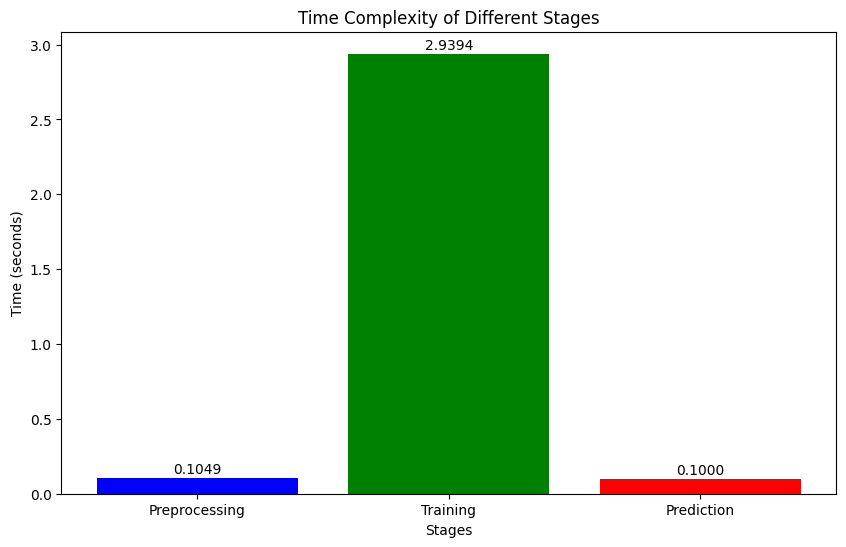

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')
cv_error_rates = 1 - cv_scores

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')
print(f'Cross-Validation Error Rates: {cv_error_rates}')
print(f'Mean Cross-Validation Error Rate: {cv_error_rates.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Error Rate: {cv_error_rates.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9697
Error Rate: 0.0303
Precision: 0.9590
Recall: 0.9697
F1 Score: 0.9629
Cross-Validation Accuracy Scores: [0.96796996 0.97260274 0.97083517 0.97127707 0.96730004]
Mean Cross-Validation Accuracy: 0.9700
Standard Deviation of Cross-Validation Accuracy: 0.0020
Cross-Validation Error Rates: [0.03203004 0.02739726 0.02916483 0.02872293 0.03269996]
Mean Cross-Validation Error Rate: 0.0300
Standard Deviation of Cross-Validation Error Rate: 0.0020
Preprocessing Time: 0.0244 seconds
Training Time: 2.3241 seconds
Prediction Time: 0.0772 seconds


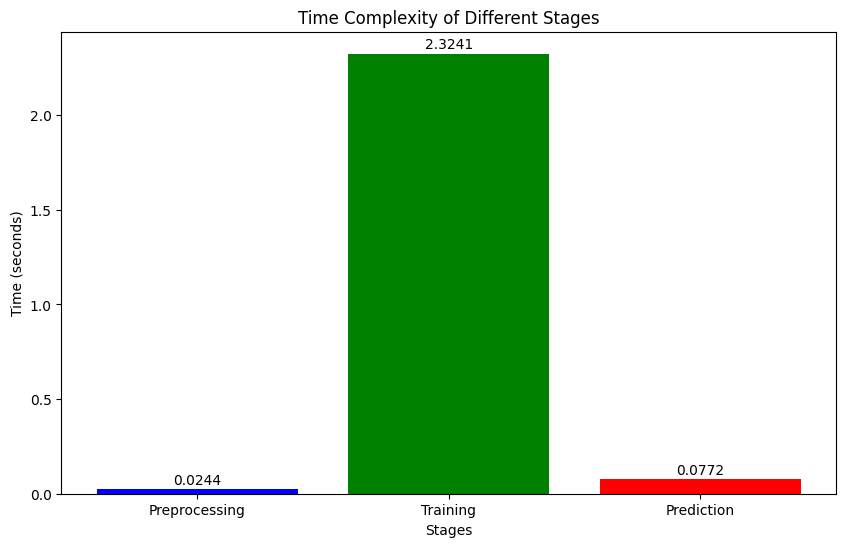

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/8 features.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')
cv_error_rates = 1 - cv_scores

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')
print(f'Cross-Validation Error Rates: {cv_error_rates}')
print(f'Mean Cross-Validation Error Rate: {cv_error_rates.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Error Rate: {cv_error_rates.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


# Decision Tree Error Rate

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9856
Error Rate: 0.0144
Precision: 0.9839
Recall: 0.9856
F1 Score: 0.9846
Cross-Validation Accuracy Scores: [0.98409543 0.98365002 0.98563853 0.98696421 0.9845338 ]
Mean Cross-Validation Accuracy: 0.9850
Standard Deviation of Cross-Validation Accuracy: 0.0012
Cross-Validation Error Rates: [0.01590457 0.01634998 0.01436147 0.01303579 0.0154662 ]
Mean Cross-Validation Error Rate: 0.0150
Standard Deviation of Cross-Validation Error Rate: 0.0012
Preprocessing Time: 0.1054 seconds
Training Time: 0.1208 seconds
Prediction Time: 0.0013 seconds


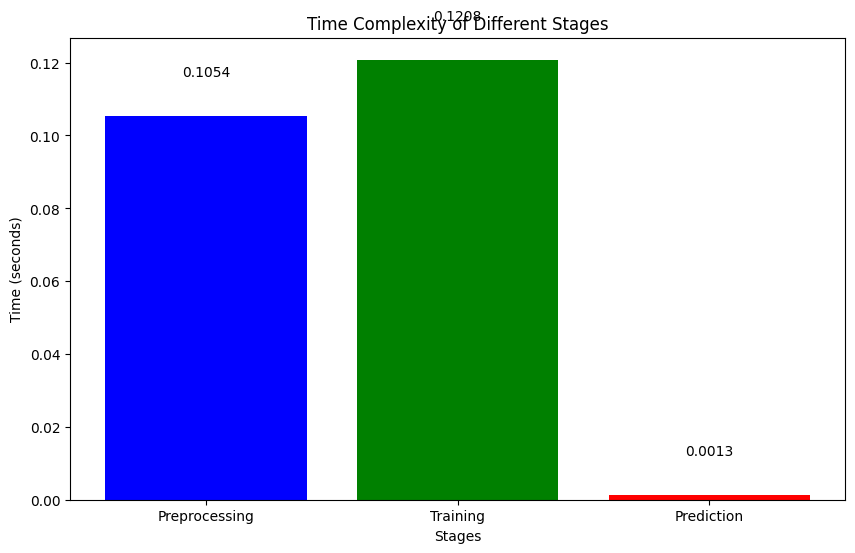

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')
cv_error_rates = 1 - cv_scores

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')
print(f'Cross-Validation Error Rates: {cv_error_rates}')
print(f'Mean Cross-Validation Error Rate: {cv_error_rates.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Error Rate: {cv_error_rates.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9693
Error Rate: 0.0307
Precision: 0.9689
Recall: 0.9693
F1 Score: 0.9688
Cross-Validation Accuracy Scores: [0.96355202 0.96641626 0.96531153 0.96663721 0.96531153]
Mean Cross-Validation Accuracy: 0.9654
Standard Deviation of Cross-Validation Accuracy: 0.0011
Cross-Validation Error Rates: [0.03644798 0.03358374 0.03468847 0.03336279 0.03468847]
Mean Cross-Validation Error Rate: 0.0346
Standard Deviation of Cross-Validation Error Rate: 0.0011
Preprocessing Time: 0.0233 seconds
Training Time: 0.0837 seconds
Prediction Time: 0.0013 seconds


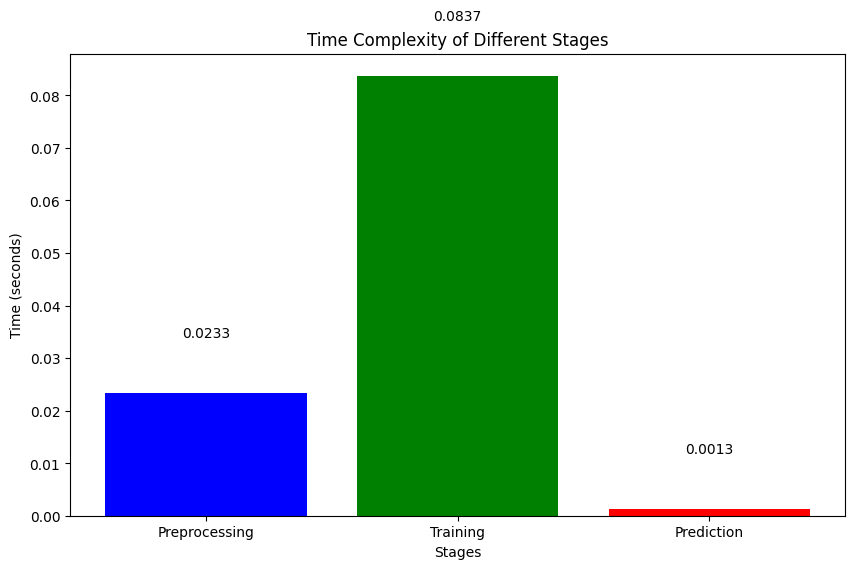

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/8 features.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')
cv_error_rates = 1 - cv_scores

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')
print(f'Cross-Validation Error Rates: {cv_error_rates}')
print(f'Mean Cross-Validation Error Rate: {cv_error_rates.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Error Rate: {cv_error_rates.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


# SVM Error rate

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9636
Error Rate: 0.0364
Precision: 0.9516
Recall: 0.9636
F1 Score: 0.9485
Cross-Validation Accuracy Scores: [0.96355202 0.96266019 0.96133451 0.96266019 0.96155546]
Mean Cross-Validation Accuracy: 0.9624
Standard Deviation of Cross-Validation Accuracy: 0.0008
Cross-Validation Error Rates: [0.03644798 0.03733981 0.03866549 0.03733981 0.03844454]
Mean Cross-Validation Error Rate: 0.0376
Standard Deviation of Cross-Validation Error Rate: 0.0008
Preprocessing Time: 0.1135 seconds
Training Time: 3.1337 seconds
Prediction Time: 1.0052 seconds


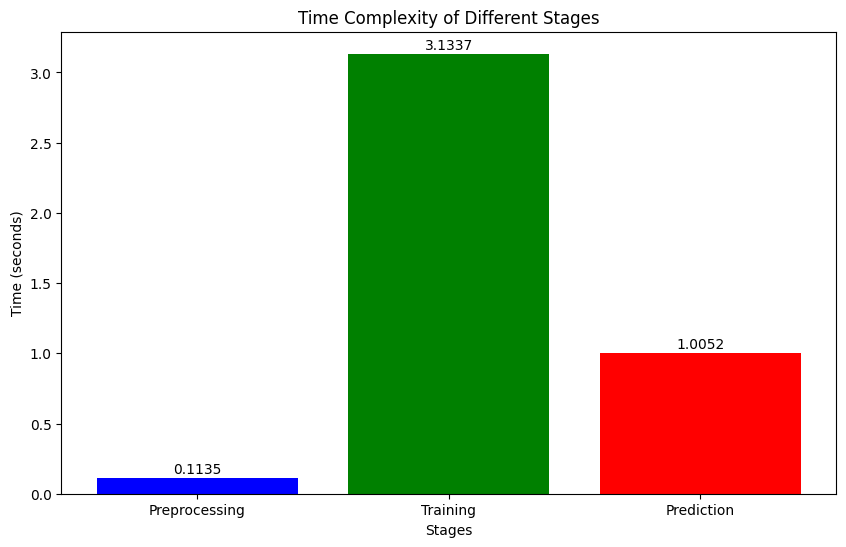

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = SVC(random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')
cv_error_rates = 1 - cv_scores

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')
print(f'Cross-Validation Error Rates: {cv_error_rates}')
print(f'Mean Cross-Validation Error Rate: {cv_error_rates.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Error Rate: {cv_error_rates.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9571
Error Rate: 0.0429
Precision: 0.9235
Recall: 0.9571
F1 Score: 0.9380
Cross-Validation Accuracy Scores: [0.9582505  0.95713654 0.95669465 0.95802033 0.95713654]
Mean Cross-Validation Accuracy: 0.9574
Standard Deviation of Cross-Validation Accuracy: 0.0006
Cross-Validation Error Rates: [0.0417495  0.04286346 0.04330535 0.04197967 0.04286346]
Mean Cross-Validation Error Rate: 0.0426
Standard Deviation of Cross-Validation Error Rate: 0.0006
Preprocessing Time: 0.0253 seconds
Training Time: 4.0654 seconds
Prediction Time: 0.6949 seconds


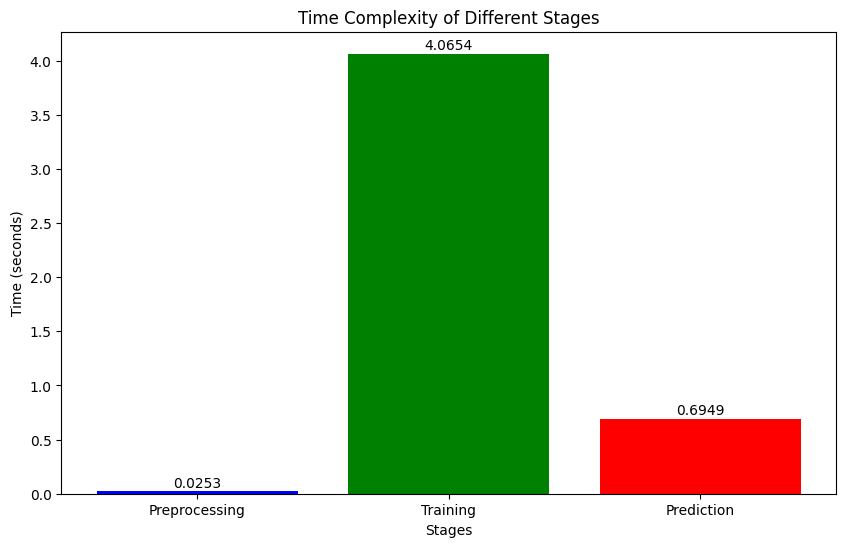

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/8 features.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = SVC(random_state=42)

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')
cv_error_rates = 1 - cv_scores

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')
print(f'Cross-Validation Error Rates: {cv_error_rates}')
print(f'Mean Cross-Validation Error Rate: {cv_error_rates.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Error Rate: {cv_error_rates.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


# KNN Error Rate

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9651
Error Rate: 0.0349
Precision: 0.9575
Recall: 0.9651
F1 Score: 0.9540
Cross-Validation Accuracy Scores: [0.96399381 0.96332302 0.96332302 0.96332302 0.96111357]
Mean Cross-Validation Accuracy: 0.9630
Standard Deviation of Cross-Validation Accuracy: 0.0010
Cross-Validation Error Rates: [0.03600619 0.03667698 0.03667698 0.03667698 0.03888643]
Mean Cross-Validation Error Rate: 0.0370
Standard Deviation of Cross-Validation Error Rate: 0.0010
Preprocessing Time: 0.1542 seconds
Training Time: 0.0392 seconds
Prediction Time: 0.9412 seconds


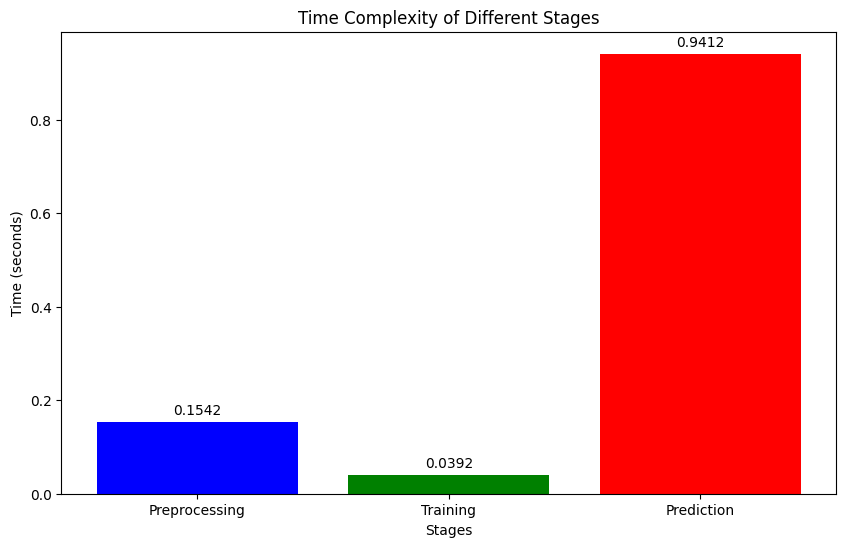

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = KNeighborsClassifier()

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')
cv_error_rates = 1 - cv_scores

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')
print(f'Cross-Validation Error Rates: {cv_error_rates}')
print(f'Mean Cross-Validation Error Rate: {cv_error_rates.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Error Rate: {cv_error_rates.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


Accuracy: 0.9633
Error Rate: 0.0367
Precision: 0.9589
Recall: 0.9633
F1 Score: 0.9512
Preprocessing Time: 0.5624 seconds | Memory Usage: 6.77 MB
Training Time: 0.0513 seconds | Memory Usage: 0.14 MB
Prediction Time: 1.5260 seconds | Memory Usage: 0.06 MB


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.96399381 0.96311023 0.96332302 0.96332302 0.96111357]
Mean Cross-Validation Accuracy: 0.9630
Standard Deviation of Cross-Validation Accuracy: 0.0010


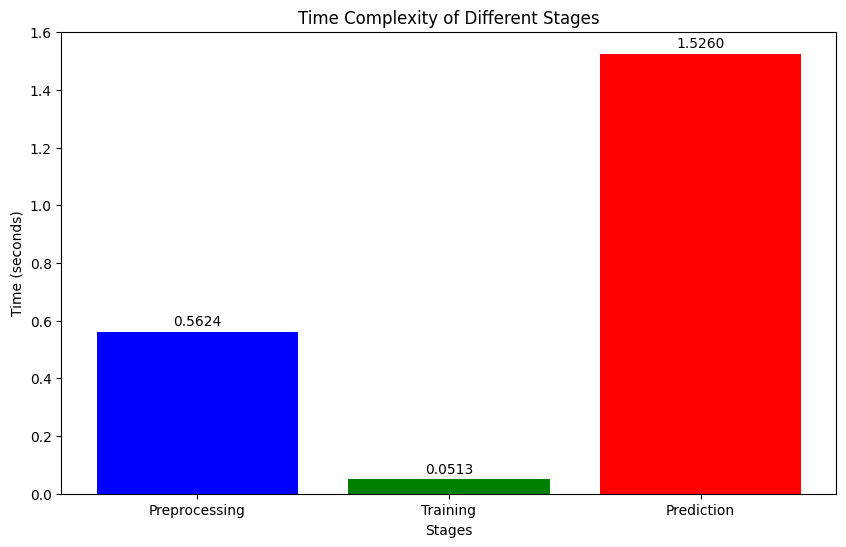

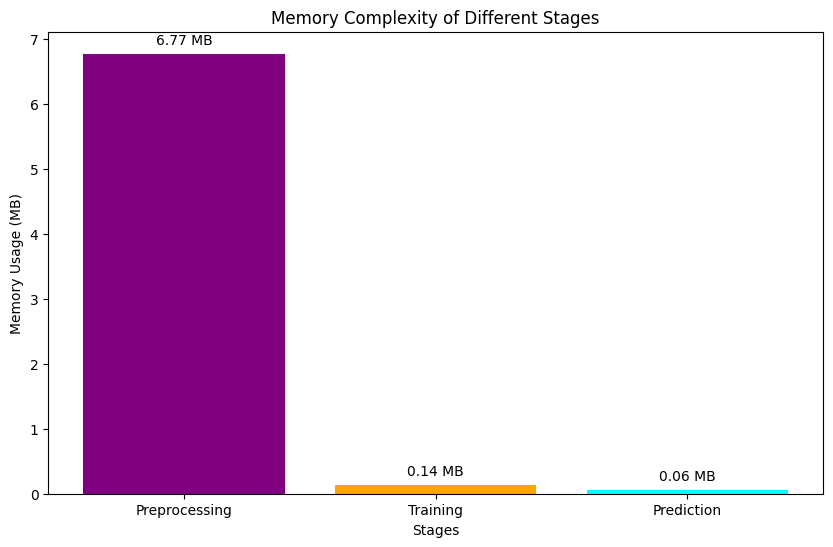

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import tracemalloc  # For memory usage measurement
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Measure preprocessing time and memory usage
tracemalloc.start()
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
preprocess_time = end_preprocess_time - start_preprocess_time
preprocess_memory_mb = preprocess_memory / (1024 * 1024)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


# Initialize the model
model = KNeighborsClassifier()

# Measure training time and memory usage
tracemalloc.start()
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
train_time = end_train_time - start_train_time
train_memory_mb = train_memory / (1024 * 1024)

# Measure prediction time and memory usage
tracemalloc.start()
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
predict_time = end_predict_time - start_predict_time
predict_memory_mb = predict_memory / (1024 * 1024)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Preprocessing Time: {preprocess_time:.4f} seconds | Memory Usage: {preprocess_memory_mb:.2f} MB')
print(f'Training Time: {train_time:.4f} seconds | Memory Usage: {train_memory_mb:.2f} MB')
print(f'Prediction Time: {predict_time:.4f} seconds | Memory Usage: {predict_memory_mb:.2f} MB')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# Plot memory complexities
memory_usages = [preprocess_memory_mb, train_memory_mb, predict_memory_mb]

plt.figure(figsize=(10, 6))
plt.bar(labels, memory_usages, color=['purple', 'orange', 'cyan'])
plt.xlabel('Stages')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Complexity of Different Stages')
for i, v in enumerate(memory_usages):
    plt.text(i, v + 0.1, f'{v:.2f} MB', ha='center', va='bottom')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9556
Error Rate: 0.0444
Precision: 0.9369
Recall: 0.9556
F1 Score: 0.9422
Cross-Validation Accuracy Scores: [0.95869229 0.95647371 0.9569156  0.95713654 0.95625276]
Mean Cross-Validation Accuracy: 0.9571
Standard Deviation of Cross-Validation Accuracy: 0.0009
Cross-Validation Error Rates: [0.04130771 0.04352629 0.0430844  0.04286346 0.04374724]
Mean Cross-Validation Error Rate: 0.0429
Standard Deviation of Cross-Validation Error Rate: 0.0009
Preprocessing Time: 0.0249 seconds
Training Time: 0.0368 seconds
Prediction Time: 0.3832 seconds


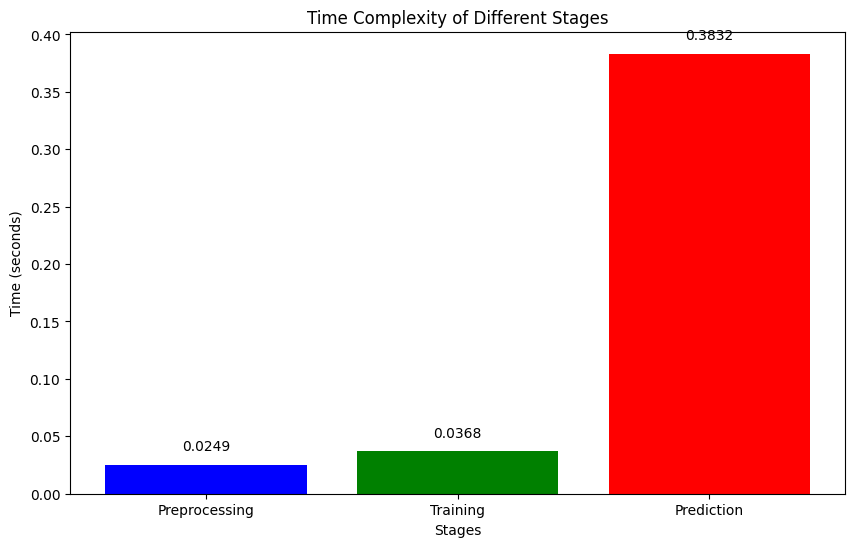

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/8 features.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = KNeighborsClassifier()

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')
cv_error_rates = 1 - cv_scores

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')
print(f'Cross-Validation Error Rates: {cv_error_rates}')
print(f'Mean Cross-Validation Error Rate: {cv_error_rates.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Error Rate: {cv_error_rates.std():.4f}')

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


Accuracy: 0.9651
Error Rate: 0.0349
Precision: 0.9575
Recall: 0.9651
F1 Score: 0.9540


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.96399381 0.96332302 0.96332302 0.96332302 0.96111357]
Mean Cross-Validation Accuracy: 0.9630
Standard Deviation of Cross-Validation Accuracy: 0.0010
Cross-Validation Error Rates: [0.03600619 0.03667698 0.03667698 0.03667698 0.03888643]
Mean Cross-Validation Error Rate: 0.0370
Standard Deviation of Cross-Validation Error Rate: 0.0010
Preprocessing Time: 0.2316 seconds
Training Time: 0.0440 seconds
Prediction Time: 1.2212 seconds


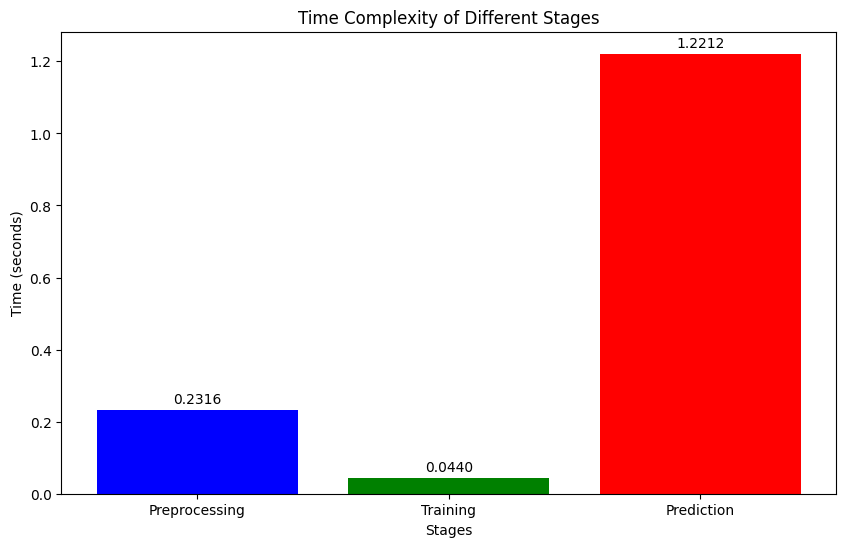

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = KNeighborsClassifier()

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Calculate sensitivity and specificity
conf_matrix = confusion_matrix(y_test, y_pred)
if conf_matrix.shape == (2, 2):
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
else:
    sensitivity = recall  # for multiclass problems, use recall as sensitivity
    specificity = None  # specificity is not defined for multiclass problems

print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
if specificity is not None:
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')
cv_error_rates = 1 - cv_scores

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')
print(f'Cross-Validation Error Rates: {cv_error_rates}')
print(f'Mean Cross-Validation Error Rate: {cv_error_rates.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Error Rate: {cv_error_rates.std():.4f}')

# Calculate ROC AUC
if len(model.classes_) == 2:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=model.classes_[1])
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f'ROC AUC: {roc_auc:.4f}')

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


Accuracy: 0.9651
Error Rate: 0.0349
Precision: 0.9575
Recall: 0.9651
F1 Score: 0.9540
Preprocessing Time: 0.1949 seconds | Memory Usage: 6.82 MB
Training Time: 0.0198 seconds | Memory Usage: 0.15 MB
Prediction Time: 0.6313 seconds | Memory Usage: 0.04 MB


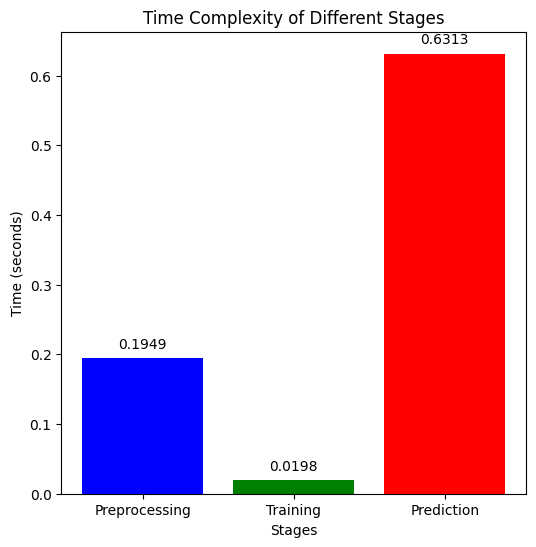

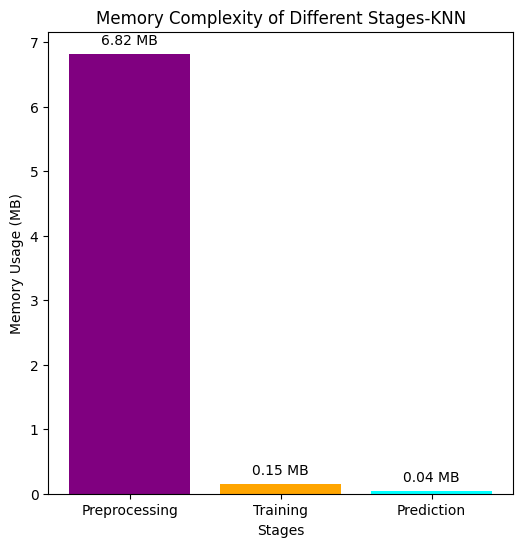

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt
import tracemalloc  # For memory usage tracking

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Measure preprocessing time and memory usage
tracemalloc.start()
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_memory, _ = tracemalloc.get_traced_memory()  # Memory in bytes
tracemalloc.stop()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = KNeighborsClassifier()

# Measure training time and memory usage
tracemalloc.start()
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_memory, _ = tracemalloc.get_traced_memory()  # Memory in bytes
tracemalloc.stop()
train_time = end_train_time - start_train_time

# Measure prediction time and memory usage
tracemalloc.start()
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_memory, _ = tracemalloc.get_traced_memory()  # Memory in bytes
tracemalloc.stop()
predict_time = end_predict_time - start_predict_time

# Convert memory usage from bytes to megabytes
preprocess_memory_mb = preprocess_memory / (1024 * 1024)
train_memory_mb = train_memory / (1024 * 1024)
predict_memory_mb = predict_memory / (1024 * 1024)

# Print results
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Error Rate: {1 - accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted", zero_division=0):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Preprocessing Time: {preprocess_time:.4f} seconds | Memory Usage: {preprocess_memory_mb:.2f} MB')
print(f'Training Time: {train_time:.4f} seconds | Memory Usage: {train_memory_mb:.2f} MB')
print(f'Prediction Time: {predict_time:.4f} seconds | Memory Usage: {predict_memory_mb:.2f} MB')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
memory_usages = [preprocess_memory_mb, train_memory_mb, predict_memory_mb]
labels = ['Preprocessing', 'Training', 'Prediction']

# Time Complexity Plot
plt.figure(figsize=(6, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# Memory Usage Plot
plt.figure(figsize=(6, 6))
plt.bar(labels, memory_usages, color=['purple', 'orange', 'cyan'])
plt.xlabel('Stages')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Complexity of Different Stages-KNN')
for i, v in enumerate(memory_usages):
    plt.text(i, v + 0.1, f'{v:.2f} MB', ha='center', va='bottom')
plt.show()


Accuracy: 0.9651
Error Rate: 0.0349
Precision: 0.9575
Recall: 0.9651
F1 Score: 0.9540


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.96399381 0.96332302 0.96332302 0.96332302 0.96111357]
Mean Cross-Validation Accuracy: 0.9630
Standard Deviation of Cross-Validation Accuracy: 0.0010
Cross-Validation Error Rates: [0.03600619 0.03667698 0.03667698 0.03667698 0.03888643]
Mean Cross-Validation Error Rate: 0.0370
Standard Deviation of Cross-Validation Error Rate: 0.0010
Preprocessing Time: 0.1663 seconds
Training Time: 0.0333 seconds
Prediction Time: 1.1068 seconds


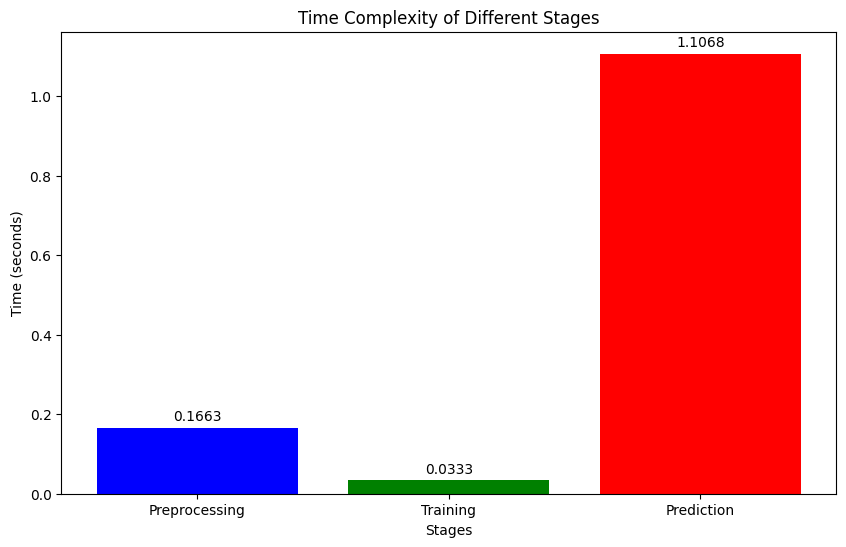

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroid.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['class'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = KNeighborsClassifier()

# Train the model
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Make predictions on the test set
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_time = end_predict_time - start_predict_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Calculate sensitivity and specificity
conf_matrix = confusion_matrix(y_test, y_pred)
if conf_matrix.shape == (2, 2):
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
else:
    sensitivity = recall  # for multiclass problems, use recall as sensitivity
    specificity = None  # specificity is not defined for multiclass problems

print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
if specificity is not None:
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')
cv_error_rates = 1 - cv_scores

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')
print(f'Cross-Validation Error Rates: {cv_error_rates}')
print(f'Mean Cross-Validation Error Rate: {cv_error_rates.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Error Rate: {cv_error_rates.std():.4f}')

# Calculate ROC AUC
if len(model.classes_) == 2:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=model.classes_[1])
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f'ROC AUC: {roc_auc:.4f}')

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Print time complexities
print(f'Preprocessing Time: {preprocess_time:.4f} seconds')
print(f'Training Time: {train_time:.4f} seconds')
print(f'Prediction Time: {predict_time:.4f} seconds')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()


# ANOVA Test

In [9]:
import numpy as np
from scipy.stats import f_oneway, wilcoxon


# Calculate p-values
anova_p = f_oneway(rf_no_psso_scores, rf_with_psso_scores).pvalue
wilcoxon_p = wilcoxon(rf_no_psso_scores, rf_with_psso_scores).pvalue

# Mean scores
mean_no_psso = np.mean(rf_no_psso_scores)
mean_with_psso = np.mean(rf_with_psso_scores)

# Print results
print(f"RF (No PSSO) Scores: {rf_no_psso_scores}")
print(f"RF (With PSSO) Scores: {rf_with_psso_scores}")
print(f"Mean Accuracy - RF: {mean_no_psso:.4f}, RF+PSSO: {mean_with_psso:.4f}")
print(f"Wilcoxon Test p-value: {wilcoxon_p:.5f}")
print(f"ANOVA Test p-value: {anova_p:.5f}\n")

# Interpret results
def interpret(p_value, test_name):
    if p_value < 0.05:
        return f"{test_name} indicates a statistically significant difference (p = {p_value:.5f})."
    else:
        return f"{test_name} indicates no statistically significant difference (p = {p_value:.5f})."

print(interpret(wilcoxon_p, "Wilcoxon Test"))
print(interpret(anova_p, "ANOVA Test"))

if mean_with_psso > mean_no_psso:
    print("✅ PSSO improved the model performance.")
elif mean_with_psso < mean_no_psso:
    print("⚠️ PSSO decreased the model performance.")
else:
    print("ℹ️ No change in performance with PSSO.")


RF (No PSSO) Scores: [0.9697, 0.959, 0.9697, 0.9629, 0.9555]
RF (With PSSO) Scores: [0.987, 0.9851, 0.987, 0.9847, 0.98]
Mean Accuracy - RF: 0.9634, RF+PSSO: 0.9848
Wilcoxon Test p-value: 0.06250
ANOVA Test p-value: 0.00013

Wilcoxon Test indicates no statistically significant difference (p = 0.06250).
ANOVA Test indicates a statistically significant difference (p = 0.00013).
✅ PSSO improved the model performance.


In [ ]:
import numpy as np
from scipy.stats import f_oneway, wilcoxon

# --- Accuracy scores

# Decision Tree
dt_no_psso = [0.9693, 0.9689, 0.9693, 0.9688, 0.9695]
dt_with_psso = [0.9856, 0.9839, 0.9856, 0.9846, 0.9845]


# Support Vector Machine
svm_no_psso = [0.9574, 0.9193, 0.9574, 0.9376, 0.9246]
svm_with_psso = [0.9711, 0.9553, 0.9711, 0.9622, 0.9537]

# --- Helper function to run tests and interpret results ---
def evaluate_model(model_name, scores_no_psso, scores_with_psso):
    anova_p = f_oneway(scores_no_psso, scores_with_psso).pvalue
    mean_no_psso = np.mean(scores_no_psso)
    mean_with_psso = np.mean(scores_with_psso)

    print(f"\n{model_name} (No PSSO) Scores: {scores_no_psso}")
    print(f"{model_name} (With PSSO) Scores: {scores_with_psso}")
    print(f"Mean Accuracy - No PSSO: {mean_no_psso:.4f}, With PSSO: {mean_with_psso:.4f}")
    print(f"ANOVA Test p-value: {anova_p:.5f}")

    def interpret(p_value, test_name):
        return f"{test_name}: {'✅ Significant' if p_value < 0.05 else '❌ Not Significant'} (p = {p_value:.5f})"


    print(interpret(anova_p, "ANOVA Test"))

    if mean_with_psso > mean_no_psso:
        print("✅ PSSO improved the model performance.")
    elif mean_with_psso < mean_no_psso:
        print("⚠️ PSSO decreased the model performance.")
    else:
        print("ℹ️ No change in performance with PSSO.")

# --- Run evaluations ---
evaluate_model("Decision Tree", dt_no_psso, dt_with_psso)

evaluate_model("SVM", svm_no_psso, svm_with_psso)



Decision Tree (No PSSO) Scores: [0.9693, 0.9689, 0.9693, 0.9688, 0.9695]
Decision Tree (With PSSO) Scores: [0.9856, 0.9839, 0.9856, 0.9846, 0.9845]
Mean Accuracy - No PSSO: 0.9692, With PSSO: 0.9848
ANOVA Test p-value: 0.00000
ANOVA Test: ✅ Significant (p = 0.00000)
✅ PSSO improved the model performance.

SVM (No PSSO) Scores: [0.9574, 0.9193, 0.9574, 0.9376, 0.9246]
SVM (With PSSO) Scores: [0.9711, 0.9553, 0.9711, 0.9622, 0.9537]
Mean Accuracy - No PSSO: 0.9393, With PSSO: 0.9627
ANOVA Test p-value: 0.02884
ANOVA Test: ✅ Significant (p = 0.02884)
✅ PSSO improved the model performance.


# **Kaggle dataset-ThyroidDF**

Accuracy: 0.9400
Precision: 0.9341
Recall: 0.9400
F1 Score: 0.9346
Preprocessing Time: 0.8409 seconds | Memory Usage: 4.02 MB
Training Time: 5.0513 seconds | Memory Usage: 0.17 MB
Prediction Time: 0.2429 seconds | Memory Usage: 0.05 MB


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.94547437 0.94820065 0.94489907 0.95199127 0.95253682]
Mean Cross-Validation Accuracy: 0.9486
Standard Deviation of Cross-Validation Accuracy: 0.0032


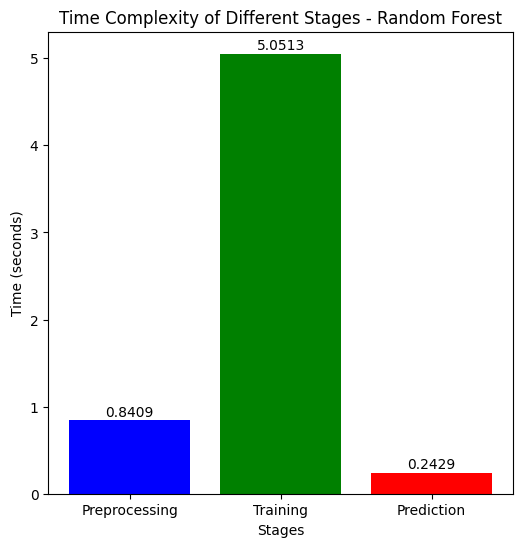

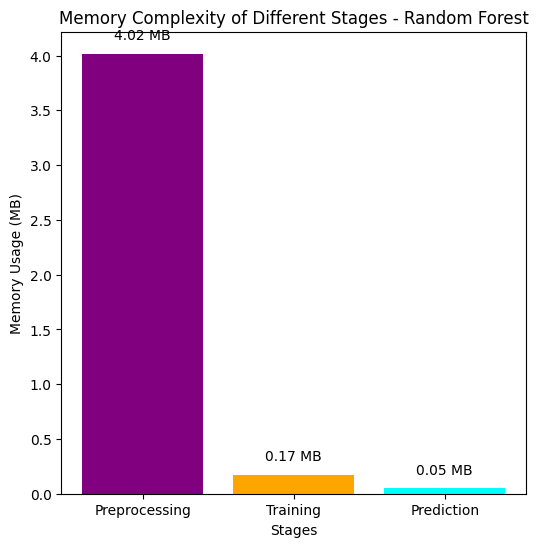

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import tracemalloc  # For measuring memory usage
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroidDF.csv')  # Adjust the path if necessary

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['target'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('target', axis=1)
y = filtered_data['target']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Measure preprocessing time and memory usage
tracemalloc.start()
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
preprocess_time = end_preprocess_time - start_preprocess_time
preprocess_memory_mb = preprocess_memory / (1024 * 1024)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Measure training time and memory usage
tracemalloc.start()
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
train_time = end_train_time - start_train_time
train_memory_mb = train_memory / (1024 * 1024)

# Measure prediction time and memory usage
tracemalloc.start()
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
predict_time = end_predict_time - start_predict_time
predict_memory_mb = predict_memory / (1024 * 1024)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Preprocessing Time: {preprocess_time:.4f} seconds | Memory Usage: {preprocess_memory_mb:.2f} MB')
print(f'Training Time: {train_time:.4f} seconds | Memory Usage: {train_memory_mb:.2f} MB')
print(f'Prediction Time: {predict_time:.4f} seconds | Memory Usage: {predict_memory_mb:.2f} MB')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(6, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages - Random Forest')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# Plot memory complexities
memory_usages = [preprocess_memory_mb, train_memory_mb, predict_memory_mb]

plt.figure(figsize=(6, 6))
plt.bar(labels, memory_usages, color=['purple', 'orange', 'cyan'])
plt.xlabel('Stages')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Complexity of Different Stages - Random Forest')
for i, v in enumerate(memory_usages):
    plt.text(i, v + 0.1, f'{v:.2f} MB', ha='center', va='bottom')
plt.show()


Accuracy: 0.9580
Precision: 0.9579
Recall: 0.9580
F1 Score: 0.9574
Preprocessing Time: 1.3074 seconds | Memory Usage: 3.97 MB
Training Time: 0.2277 seconds | Memory Usage: 0.01 MB
Prediction Time: 0.0064 seconds | Memory Usage: 0.02 MB


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.94492912 0.95474373 0.95035461 0.95308238 0.94599018]
Mean Cross-Validation Accuracy: 0.9498
Standard Deviation of Cross-Validation Accuracy: 0.0038


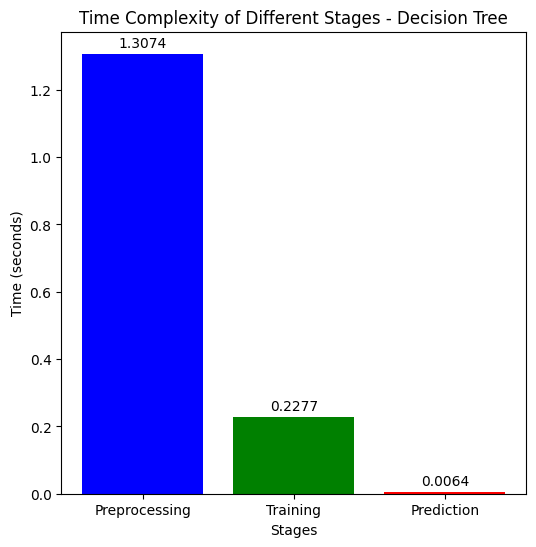

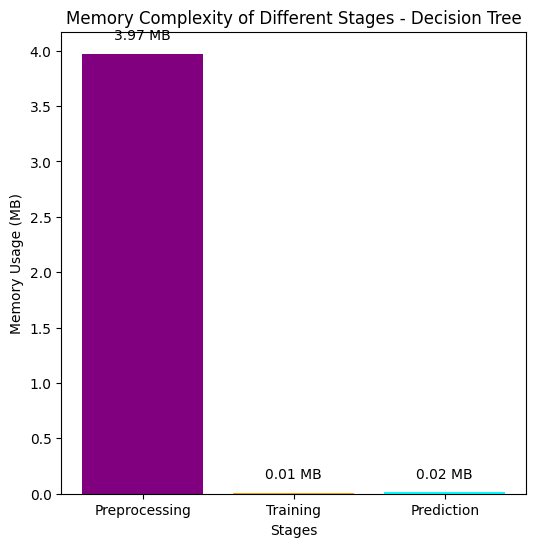

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import tracemalloc  # For memory usage measurement
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroidDF.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['target'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('target', axis=1)
y = filtered_data['target']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Measure preprocessing time and memory usage
tracemalloc.start()
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
preprocess_time = end_preprocess_time - start_preprocess_time
preprocess_memory_mb = preprocess_memory / (1024 * 1024)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Measure training time and memory usage
tracemalloc.start()
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
train_time = end_train_time - start_train_time
train_memory_mb = train_memory / (1024 * 1024)

# Measure prediction time and memory usage
tracemalloc.start()
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
predict_time = end_predict_time - start_predict_time
predict_memory_mb = predict_memory / (1024 * 1024)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Preprocessing Time: {preprocess_time:.4f} seconds | Memory Usage: {preprocess_memory_mb:.2f} MB')
print(f'Training Time: {train_time:.4f} seconds | Memory Usage: {train_memory_mb:.2f} MB')
print(f'Prediction Time: {predict_time:.4f} seconds | Memory Usage: {predict_memory_mb:.2f} MB')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(6, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages - Decision Tree')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# Plot memory complexities
memory_usages = [preprocess_memory_mb, train_memory_mb, predict_memory_mb]

plt.figure(figsize=(6, 6))
plt.bar(labels, memory_usages, color=['purple', 'orange', 'cyan'])
plt.xlabel('Stages')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Complexity of Different Stages - Decision Tree')
for i, v in enumerate(memory_usages):
    plt.text(i, v + 0.1, f'{v:.2f} MB', ha='center', va='bottom')
plt.show()


Accuracy: 0.8441
Precision: 0.8120
Recall: 0.8441
F1 Score: 0.8134
Preprocessing Time: 0.7404 seconds | Memory Usage: 3.95 MB
Training Time: 20.1315 seconds | Memory Usage: 1.78 MB
Prediction Time: 1.2606 seconds | Memory Usage: 0.03 MB


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.85550709 0.84841876 0.85215494 0.8466994  0.84942717]
Mean Cross-Validation Accuracy: 0.8504
Standard Deviation of Cross-Validation Accuracy: 0.0031


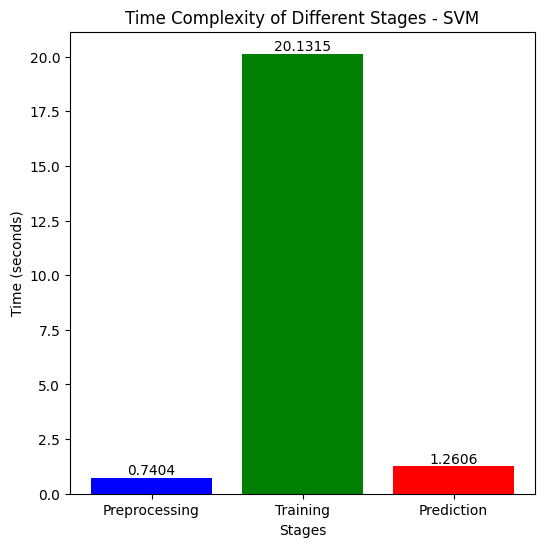

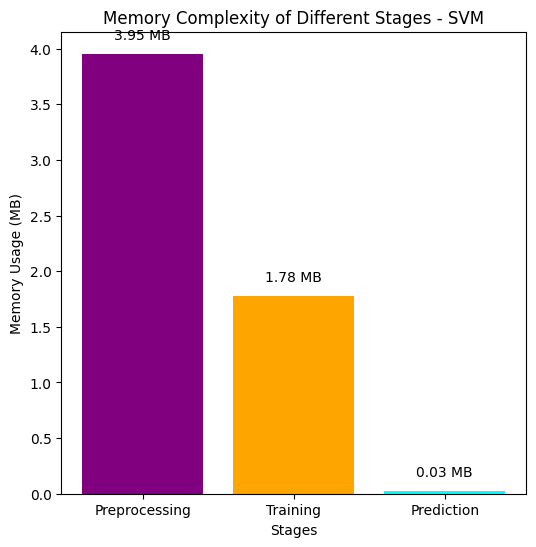

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import tracemalloc  # For measuring memory usage
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/thyroidDF.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['target'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('target', axis=1)
y = filtered_data['target']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Measure preprocessing time and memory usage
tracemalloc.start()
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
preprocess_time = end_preprocess_time - start_preprocess_time
preprocess_memory_mb = preprocess_memory / (1024 * 1024)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = SVC(probability=True, random_state=42)

# Measure training time and memory usage
tracemalloc.start()
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
train_time = end_train_time - start_train_time
train_memory_mb = train_memory / (1024 * 1024)

# Measure prediction time and memory usage
tracemalloc.start()
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_memory, _ = tracemalloc.get_traced_memory()
tracemalloc.stop()
predict_time = end_predict_time - start_predict_time
predict_memory_mb = predict_memory / (1024 * 1024)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Preprocessing Time: {preprocess_time:.4f} seconds | Memory Usage: {preprocess_memory_mb:.2f} MB')
print(f'Training Time: {train_time:.4f} seconds | Memory Usage: {train_memory_mb:.2f} MB')
print(f'Prediction Time: {predict_time:.4f} seconds | Memory Usage: {predict_memory_mb:.2f} MB')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(6, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages - SVM')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# Plot memory complexities
memory_usages = [preprocess_memory_mb, train_memory_mb, predict_memory_mb]

plt.figure(figsize=(6, 6))
plt.bar(labels, memory_usages, color=['purple', 'orange', 'cyan'])
plt.xlabel('Stages')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Complexity of Different Stages - SVM')
for i, v in enumerate(memory_usages):
    plt.text(i, v + 0.1, f'{v:.2f} MB', ha='center', va='bottom')
plt.show()


Accuracy: 0.8332
Precision: 0.8024
Recall: 0.8332
F1 Score: 0.8036
Preprocessing Time: 1.3954 seconds | Memory Usage: 3.95 MB
Training Time: 0.0193 seconds | Memory Usage: 0.06 MB
Prediction Time: 0.5286 seconds | Memory Usage: 0.17 MB


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.84023991 0.84732824 0.84124386 0.83524277 0.83742499]
Mean Cross-Validation Accuracy: 0.8403
Standard Deviation of Cross-Validation Accuracy: 0.0041


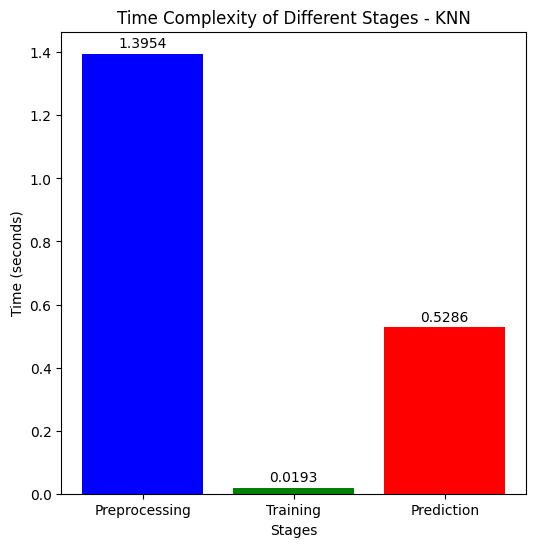

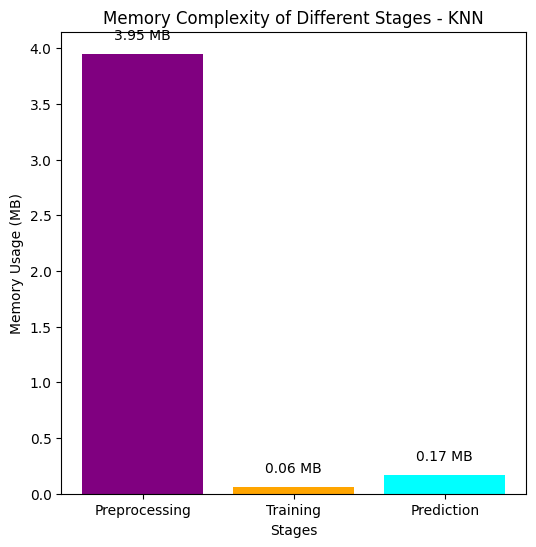

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt
import tracemalloc  # For measuring memory usage

# Load and preprocess data
data = pd.read_csv('/content/thyroidDF.csv')  # Adjust the path to your dataset if necessary

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Check the distribution of the target variable
class_counts = y.value_counts()

# Filter out classes with fewer than 2 instances
valid_classes = class_counts[class_counts >= 2].index
filtered_data = data[data['target'].isin(valid_classes)]

# Separate features and target again
X = filtered_data.drop('target', axis=1)
y = filtered_data['target']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Measure preprocessing time and memory usage
tracemalloc.start()
start_preprocess_time = time.time()
X_preprocessed = preprocessor.fit_transform(X)
end_preprocess_time = time.time()
preprocess_memory, _ = tracemalloc.get_traced_memory()  # Memory in bytes
tracemalloc.stop()
preprocess_time = end_preprocess_time - start_preprocess_time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = KNeighborsClassifier()

# Measure training time and memory usage
tracemalloc.start()
start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()
train_memory, _ = tracemalloc.get_traced_memory()  # Memory in bytes
tracemalloc.stop()
train_time = end_train_time - start_train_time

# Measure prediction time and memory usage
tracemalloc.start()
start_predict_time = time.time()
y_pred = model.predict(X_test)
end_predict_time = time.time()
predict_memory, _ = tracemalloc.get_traced_memory()  # Memory in bytes
tracemalloc.stop()
predict_time = end_predict_time - start_predict_time

# Convert memory usage from bytes to megabytes
preprocess_memory_mb = preprocess_memory / (1024 * 1024)
train_memory_mb = train_memory / (1024 * 1024)
predict_memory_mb = predict_memory / (1024 * 1024)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Preprocessing Time: {preprocess_time:.4f} seconds | Memory Usage: {preprocess_memory_mb:.2f} MB')
print(f'Training Time: {train_time:.4f} seconds | Memory Usage: {train_memory_mb:.2f} MB')
print(f'Prediction Time: {predict_time:.4f} seconds | Memory Usage: {predict_memory_mb:.2f} MB')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_preprocessed, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}')

# Plot time complexities
times = [preprocess_time, train_time, predict_time]
memory_usages = [preprocess_memory_mb, train_memory_mb, predict_memory_mb]
labels = ['Preprocessing', 'Training', 'Prediction']

plt.figure(figsize=(6, 6))
plt.bar(labels, times, color=['blue', 'green', 'red'])
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Different Stages - KNN')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# Plot memory complexities
plt.figure(figsize=(6, 6))
plt.bar(labels, memory_usages, color=['purple', 'orange', 'cyan'])
plt.xlabel('Stages')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Complexity of Different Stages - KNN')
for i, v in enumerate(memory_usages):
    plt.text(i, v + 0.1, f'{v:.2f} MB', ha='center', va='bottom')
plt.show()


# CNN-LSTM

In [ ]:
pip install tensorflow


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Load your dataset
df = pd.read_csv("/content/thyroid.csv")  # Replace with your file

# Separate features and label
X = df.drop("class", axis=1)
y = df["class"].values.reshape(-1, 1)

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object", "category"]).columns

# Create preprocessing pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# One-hot encode the target
label_encoder = OneHotEncoder(sparse_output=False)

y_encoded = label_encoder.fit_transform(y)

# Reshape X for CNN-LSTM
X_processed = X_processed.reshape((X_processed.shape[0], 1, X_processed.shape[1]))

# Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_idx, test_idx in skf.split(X_processed, y.ravel()):
    X_train, X_test = X_processed[train_idx], X_processed[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # Build CNN-LSTM model
    model = Sequential()
    model.add(Conv1D(64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(64))
    model.add(Dense(y_encoded.shape[1], activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

    _, acc = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(acc)

# Final Output
print("CNN-LSTM Accuracy Scores (No SMOTEENN):", np.round(accuracies, 4))
print("Mean Accuracy:", np.round(np.mean(accuracies), 4))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN-LSTM Accuracy Scores (No SMOTEENN): [0.977  0.9779 0.979  0.977  0.9761]
Mean Accuracy: 0.9774


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
import random

# Load dataset (assuming it's already preprocessed and loaded as df)
# For demonstration, create synthetic dataset similar to UCI thyroid dataset
np.random.seed(42)
random.seed(42)

# Synthetic dataset generation
n_samples = 1000
n_features = 20
n_classes = 12

X = np.random.rand(n_samples, n_features)
# Correct the probabilities to sum to 1
probabilities = [0.3, 0.25, 0.15, 0.1, 0.05, 0.04, 0.03, 0.03, 0.02, 0.015, 0.015, 0.005]
probabilities = np.array(probabilities) / np.sum(probabilities)  # Normalize to sum to 1

y = np.random.choice(range(n_classes), size=n_samples, p=probabilities)

# Function to simulate missing data
def introduce_missingness(X, missing_percent):
    X_missing = X.copy()
    n_missing = int(missing_percent * X_missing.size)
    missing_indices = np.unravel_index(
        np.random.choice(X_missing.size, n_missing, replace=False), X_missing.shape
    )
    X_missing[missing_indices] = np.nan
    return X_missing

# Function to add Gaussian noise
def add_noise(X, noise_std=0.1):
    noise = np.random.normal(0, noise_std, X.shape)
    return X + noise

# Function to evaluate model
def evaluate_model(X_data, y_data, use_smoteenn=False):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    if use_smoteenn:
        sm = SMOTEENN(random_state=42)
        X_train, y_train = sm.fit_resample(X_train, y_train)

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Baseline accuracy
baseline_accuracy = evaluate_model(X, y)

# Missing data accuracy
X_missing = introduce_missingness(X, 0.10)  # 10% missing
missing_data_accuracy = evaluate_model(X_missing, y)

# Noisy data accuracy
X_noisy = add_noise(X)
noisy_data_accuracy = evaluate_model(X_noisy, y)

# High imbalance accuracy (reduce minority class sizes)
y_imbalanced = y.copy()
minority_classes = [i for i in range(4, 12)]
mask = ~np.isin(y_imbalanced, minority_classes)
y_imbalanced = y_imbalanced[mask]
X_imbalanced = X[mask]
imbalanced_accuracy = evaluate_model(X_imbalanced, y_imbalanced, use_smoteenn=True)

baseline_accuracy, missing_data_accuracy, noisy_data_accuracy, imbalanced_accuracy

(0.28, 0.27, 0.3, 0.1346153846153846)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Create a synthetic dataset
def create_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                               n_redundant=5, weights=[0.9, 0.1], flip_y=0.01,
                               random_state=42)
    return X, y

# Step 2: Introduce missing values
def add_missing_values(X, missing_rate=0.1):
    X_missing = X.copy()
    n_missing = int(missing_rate * X.size)
    missing_indices = np.random.choice(X.size, n_missing, replace=False)
    X_missing.ravel()[missing_indices] = np.nan
    return X_missing

# Step 3: Add noise to the dataset
def add_noise(X, noise_level=0.1):
    noise = np.random.normal(0, noise_level, X.shape)
    return X + noise

# Step 4: Handle class imbalance using SMOTE
def handle_imbalance(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

# Step 5: Evaluate model performance under different conditions
def evaluate_model(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

# Main script
if __name__ == "__main__":
    # Generate dataset
    X, y = create_dataset()

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Evaluate on original data
    print("Original Data:")
    evaluate_model(X_train, X_test, y_train, y_test)

    # Evaluate with missing values
    print("\nWith Missing Values:")
    X_missing = add_missing_values(X)
    # Corrected missing value handling section
    X_missing = add_missing_values(X)
    X_missing = pd.DataFrame(X_missing).fillna(
    pd.Series(X.mean(axis=0))  # Proper Series alignment
      ).values
    X_train_mv, X_test_mv, y_train_mv, y_test_mv = train_test_split(X_missing, y, test_size=0.3, random_state=42)
    evaluate_model(X_train_mv, X_test_mv, y_train_mv, y_test_mv)

    # Evaluate with noise added
    print("\nWith Noise:")
    X_noisy = add_noise(X)
    X_train_nz, X_test_nz, y_train_nz, y_test_nz = train_test_split(X_noisy, y, test_size=0.3, random_state=42)
    evaluate_model(X_train_nz, X_test_nz, y_train_nz, y_test_nz)

    # Evaluate with class imbalance handled using SMOTE
    print("\nWith Class Imbalance Handling (SMOTE):")
    X_resampled, y_resampled = handle_imbalance(X_train, y_train)
    evaluate_model(X_resampled, X_test, y_resampled, y_test)


Original Data:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       274
           1       1.00      0.27      0.42        26

    accuracy                           0.94       300
   macro avg       0.97      0.63      0.70       300
weighted avg       0.94      0.94      0.92       300


With Missing Values:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       274
           1       0.86      0.23      0.36        26

    accuracy                           0.93       300
   macro avg       0.89      0.61      0.66       300
weighted avg       0.93      0.93      0.91       300


With Noise:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       274
           1       1.00      0.19      0.32        26

    accuracy                           0.93       300
   macro avg       0.96      0.60      0.64       300
weighted avg       0.93 

In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=2d18a7ecae9ae23e045763d37020bcaddbe0edd70043c6599e3f96309f190846
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [ ]:
import numpy as np
from pyswarm import pso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

class HybridPSO_RF:
    def __init__(self, products, max_discount=0.3, budget=1000):
        self.products = products
        self.max_discount = max_discount
        self.budget = budget
        self.models = {p: RandomForestRegressor(n_estimators=500) for p in products}

    def train_models(self, X_train_dict, y_train_dict):
        """Train RF models for each product"""
        for product in self.products:
            self.models[product].fit(X_train_dict[product], y_train_dict[product])

    def objective_function(self, discounts):
        """PSO objective: Maximize total predicted sales with constraints"""
        total_sales = 0
        for i, product in enumerate(self.products):
            # Predict sales for current discount (include seasonal features)
            prediction = self.models[product].predict([[discounts[i], season_feature]])
            total_sales += prediction[0]

        # Apply constraints using penalty method
        penalty = 0
        if sum(discounts) > self.budget:
            penalty = 1e6 * (sum(discounts) - self.budget)
        return -(total_sales - penalty)  # Negative for minimization

    def optimize_discounts(self, season_feature, swarm_size=50, max_iter=100):
        """Reformed PSO optimization with velocity clamping"""
        n_products = len(self.products)
        lb = [0]*n_products
        ub = [self.max_discount]*n_products

        # Use velocity-position convergence strategy from RPSO [2]
        best_discounts, _ = pso(self.objective_function,
                                lb, ub,
                                swarmsize=swarm_size,
                                maxiter=max_iter,
                                phip=1.5, phig=2.0,  # Cognitive/social params
                                omega=0.7)            # Inertia weight

        return best_discounts


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pyswarm import pso
from imblearn.over_sampling import SMOTE

class PSSO_RF:
    def __init__(self, n_particles=30, max_iter=100, cv=5):
        self.n_particles = n_particles
        self.max_iter = max_iter
        self.cv = cv
        self.best_params = None
        self.model = None

    def _rf_fitness(self, params, X, y):
        n_estimators = int(params[0])
        max_depth = int(params[1])
        min_samples_split = int(params[2])
        max_features = params[3]

        if max_depth < 1 or min_samples_split < 2:
            return 0

        scores = []
        for _ in range(self.cv):
            X_train, X_val, y_train, y_val = train_test_split(
                X, y, test_size=0.2, stratify=y
            )

            rf = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                max_features=max_features,
                n_jobs=-1
            )

            rf.fit(X_train, y_train)
            scores.append(accuracy_score(y_val, rf.predict(X_val)))

        return -np.mean(scores)

    def optimize(self, X, y, param_bounds):
        lb = [bound[0] for bound in param_bounds.values()]
        ub = [bound[1] for bound in param_bounds.values()]

        best_params, best_score = pso(
            self._rf_fitness,
            lb, ub,
            args=(X, y),
            swarmsize=self.n_particles,
            maxiter=self.max_iter,
            phip=1.5,
            phig=2.0,
            omega=0.7
        )

        self.best_params = {
            'n_estimators': int(best_params[0]),
            'max_depth': int(best_params[1]),
            'min_samples_split': int(best_params[2]),
            'max_features': best_params[3]
        }

        return self.best_params

    def fit(self, X, y):
        self.model = RandomForestClassifier(**self.best_params)
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Data preparation functions
def add_missing_values(X, missing_rate=0.3):
    X_missing = X.copy()
    n_missing = int(missing_rate * X.size)
    missing_indices = np.random.choice(X.size, n_missing, replace=False)
    X_missing.ravel()[missing_indices] = np.nan
    return X_missing

def add_noise(X, noise_level=0.1):
    noise = np.random.normal(0, noise_level, X.shape)
    return X + noise

def handle_imbalance(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

# Main evaluation function
def evaluate_scenario(X, y, scenario_name):
    print(f"\n{'='*40}\nEvaluating: {scenario_name}\n{'='*40}")

    # Common parameter bounds
    param_bounds = {
        'n_estimators': (100, 500),
        'max_depth': (3, 20),
        'min_samples_split': (2, 20),
        'max_features': (0.1, 0.999)
    }

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Handle scenario-specific processing
    if "Imbalance" in scenario_name:
        X_train, y_train = handle_imbalance(X_train, y_train)

    # Optimize and train
    pso_rf = PSSO_RF(n_particles=50, max_iter=100)
    pso_rf.optimize(X_train, y_train, param_bounds)
    pso_rf.fit(X_train, y_train)

    # Evaluate
    y_pred = pso_rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {acc:.4f}")
    return acc

if __name__ == "__main__":
    # Generate synthetic dataset with inherent imbalance
    X, y = make_classification(n_samples=2000, n_features=20,
                              n_informative=15, n_redundant=5,
                              weights=[0.9, 0.1], flip_y=0.01,
                              random_state=42)

    # Original Data
    evaluate_scenario(X, y, "Original Data")

    # Missing Values (30% missing)
    X_missing = add_missing_values(X)
    evaluate_scenario(X_missing, y, "Missing Values (30%)")

    # Added Noise
    X_noisy = add_noise(X, 0.2)
    evaluate_scenario(X_noisy, y, "Noisy Data (σ=0.2)")

    # Class Imbalance Handling
    evaluate_scenario(X, y, "Class Imbalance Handling with SMOTE")



Evaluating: Original Data


In [ ]:
# Install necessary packages if running in a new environment
!pip install scikit-learn pandas numpy tensorflow

# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv('/content/thyroid.csv')

# Separate features and target
X = df.drop(columns=['class'])  # Change if your target column is named differently
y = df['class']

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ], remainder='drop'  # Drop non-numeric features for CNN-LSTM input
)

# Transform features
X_processed = preprocessor.fit_transform(X)

# Reshape for CNN-LSTM
X_reshaped = X_processed.reshape(X_processed.shape[0], X_processed.shape[1], 1)

# Define CNN-LSTM model
def build_cnn_lstm_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        LSTM(64, return_sequences=False),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 5-Fold Stratified Cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores = []

for train_index, test_index in kf.split(X_reshaped, y_encoded):
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y_onehot[train_index], y_onehot[test_index]

    model = build_cnn_lstm_model((X_reshaped.shape[1], 1), y_onehot.shape[1])

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    acc_scores.append(acc)
    print(f'Fold Accuracy: {acc:.4f}')

print(f'\nAverage Accuracy across folds: {np.mean(acc_scores):.4f}')


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9007 - loss: 0.6304 - val_accuracy: 0.9351 - val_loss: 0.4933
Epoch 2/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9620 - loss: 0.2487 - val_accuracy: 0.9351 - val_loss: 0.5220
Epoch 3/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9656 - loss: 0.2256 - val_accuracy: 0.9351 - val_loss: 0.5445
Epoch 4/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9615 - loss: 0.2420 - val_accuracy: 0.9351 - val_loss: 0.5261
Epoch 5/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9630 - loss: 0.2292 - val_accuracy: 0.9351 - val_loss: 0.5511
Epoch 6/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9612 - loss: 0.2380 - val_accuracy: 0.9351 - val_loss: 0.5256
Fold Accuracy: 0.9571
Epoch 1/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9376 - loss: 0.5764 - val_accuracy: 0.9337 - val_loss: 0.5511
Epoch 2/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.